In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mstats
import matplotlib.pyplot as plt

In [53]:
weekly_agg_prices = pd.read_csv("weekly_agg_0411.csv") 
#%>% select(time, pool_address, tx_users, price_std, price_avg, buy_trades, sell_trades, vol_token_usd, vol_stable)

In [57]:
weekly_agg_prices

,Unnamed: 0,pool_address,time,buy_trades,sell_trades,num_trades,unique_txs,tx_users,net_stable,net_token,net_token_usd,vol_token,vol_token_usd,vol_stable,price_high,price_low,price_open,price_close,price_std,price_avg
0,0,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-05-03,2889,2759,5648,5648,1866,3.139134e+06,-861.301385,-3153010.54,18979.576439,70098662.62,7.009368e+07,3975.292253,3349.181678,3433.370413,3906.424506,188.739247,3654.958780
1,1,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-05-10,3527,3000,6527,6527,1730,2.468409e+05,-54.595758,-207195.10,12886.839241,51993481.50,5.117209e+07,4372.113746,3336.447327,3902.133255,3567.240127,186.215148,3941.474833
2,2,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-05-17,1219,897,2116,2116,563,-7.690456e+04,24.223341,81383.05,725.918200,2444562.01,2.413838e+06,3585.057495,1905.583186,3575.206633,2108.803408,317.176748,3261.199929
3,3,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-05-24,4916,4044,8960,8960,2106,1.717349e+04,-1.569119,993.28,12579.741659,30773281.38,3.074684e+07,2923.242242,2115.270760,2115.418136,2395.160511,181.041694,2533.840226
4,4,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-05-31,8394,6953,15347,15346,3016,1.733015e+04,-8.264179,36407.67,17944.083230,47247734.11,4.738002e+07,2909.021429,2281.002819,2392.852796,2703.559804,115.982670,2673.380266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,683,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,2022-11-28,397,411,808,808,96,2.512381e+06,-1981.507516,-2405592.85,18357.094769,22724446.39,2.276771e+07,1305.979401,1150.134977,1197.582557,1283.445721,45.830128,1241.879897
684,684,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,2022-12-05,259,301,560,560,77,-6.950951e+05,589.060816,734522.89,11237.245936,14173053.63,1.418314e+07,1303.967915,1220.750931,1285.080354,1267.022109,19.004635,1262.322365
685,685,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,2022-12-12,349,337,686,686,104,-1.611460e+06,1379.550192,1697501.74,17155.476362,21432542.80,2.147549e+07,1349.888820,1156.288563,1258.970261,1181.597157,60.476631,1246.600832
686,686,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,2022-12-19,218,211,429,419,71,8.045047e+05,-641.420405,-772812.43,9514.447796,11437909.31,1.143246e+07,1228.970965,1154.530936,1188.688065,1223.311476,17.748461,1203.235649


In [56]:
weekly_agg_prices[["time", "pool_address", 'buy_trades', 'sell_trades',
       'num_trades', 'unique_txs', 'tx_users', 'net_stable', 'net_token',
       'net_token_usd', 'vol_token', 'vol_token_usd', 'vol_stable',
       'price_high', 'price_low', 'price_open', 'price_close', 'price_std',
       'price_avg']].rename(columns={"time":"week"})

,week,pool_address,buy_trades,sell_trades,num_trades,unique_txs,tx_users,net_stable,net_token,net_token_usd,vol_token,vol_token_usd,vol_stable,price_high,price_low,price_open,price_close,price_std,price_avg
0,2021-05-03,0x11b815efb8f581194ae79006d24e0d814b7697f6,2889,2759,5648,5648,1866,3.139134e+06,-861.301385,-3153010.54,18979.576439,70098662.62,7.009368e+07,3975.292253,3349.181678,3433.370413,3906.424506,188.739247,3654.958780
1,2021-05-10,0x11b815efb8f581194ae79006d24e0d814b7697f6,3527,3000,6527,6527,1730,2.468409e+05,-54.595758,-207195.10,12886.839241,51993481.50,5.117209e+07,4372.113746,3336.447327,3902.133255,3567.240127,186.215148,3941.474833
2,2021-05-17,0x11b815efb8f581194ae79006d24e0d814b7697f6,1219,897,2116,2116,563,-7.690456e+04,24.223341,81383.05,725.918200,2444562.01,2.413838e+06,3585.057495,1905.583186,3575.206633,2108.803408,317.176748,3261.199929
3,2021-05-24,0x11b815efb8f581194ae79006d24e0d814b7697f6,4916,4044,8960,8960,2106,1.717349e+04,-1.569119,993.28,12579.741659,30773281.38,3.074684e+07,2923.242242,2115.270760,2115.418136,2395.160511,181.041694,2533.840226
4,2021-05-31,0x11b815efb8f581194ae79006d24e0d814b7697f6,8394,6953,15347,15346,3016,1.733015e+04,-8.264179,36407.67,17944.083230,47247734.11,4.738002e+07,2909.021429,2281.002819,2392.852796,2703.559804,115.982670,2673.380266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2022-11-28,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,397,411,808,808,96,2.512381e+06,-1981.507516,-2405592.85,18357.094769,22724446.39,2.276771e+07,1305.979401,1150.134977,1197.582557,1283.445721,45.830128,1241.879897
684,2022-12-05,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,259,301,560,560,77,-6.950951e+05,589.060816,734522.89,11237.245936,14173053.63,1.418314e+07,1303.967915,1220.750931,1285.080354,1267.022109,19.004635,1262.322365
685,2022-12-12,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,349,337,686,686,104,-1.611460e+06,1379.550192,1697501.74,17155.476362,21432542.80,2.147549e+07,1349.888820,1156.288563,1258.970261,1181.597157,60.476631,1246.600832
686,2022-12-19,0xc2e9f25be6257c210d7adf0d4cd6e3e881ba25f8,218,211,429,419,71,8.045047e+05,-641.420405,-772812.43,9514.447796,11437909.31,1.143246e+07,1228.970965,1154.530936,1188.688065,1223.311476,17.748461,1203.235649


In [2]:
# read in dataset
sc_daily_obs_df = pd.read_pickle("../01_create/sc_only_daily_obs_20240130.pkl")
sc_daily_obs_df["week"] = pd.to_datetime(sc_daily_obs_df["date"]).dt.to_period('W-SAT').dt.start_time
sc_daily_obs_df.sort_values(by=["pool_address","position_id", "date"], inplace=True)
nft_type_mapping = sc_daily_obs_df[["pool_address", "nf_position_manager_address","is_verified_sc"]].drop_duplicates()

In [3]:
# filter out the starting period of sc
sc_daily_obs_df_newer = sc_daily_obs_df[sc_daily_obs_df["date"] > '2021-06-01'].copy()
sc_daily_obs_df_newer["is_verified_sc_str"] = sc_daily_obs_df_newer["is_verified_sc"].astype(str)

In [4]:
# read in the original data (pool action information)
pool_addrs = ['0x11b815efb8f581194ae79006d24e0d814b7697f6',
              '0x4e68ccd3e89f51c3074ca5072bbac773960dfa36',
              '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640',
              '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8']
pool_action_infos = pd.DataFrame()
for pool_addr in pool_addrs:
    pool_action_info = pd.read_csv("../../data/raw/lp_data/" + pool_addr + "_fixed.csv", low_memory=False)
    pool_action_infos = pd.concat([pool_action_infos, pool_action_info], ignore_index=True)

In [5]:
sc_nf_positions = sc_daily_obs_df["nf_position_manager_address"].unique()
pool_action_info_sc = pool_action_infos[pool_action_infos["nf_position_manager_address"].isin(sc_nf_positions)].copy()
pool_action_info_sc["week"] = pd.to_datetime(pool_action_info_sc["block_timestamp"]).dt.to_period('W-SAT').dt.start_time

In [6]:
pool_action_info_sc_copy = pool_action_info_sc.copy()
pool_action_info_sc_copy.sort_values(by=["pool_address", 'nf_position_manager_address', 'liquidity_provider', "block_timestamp"] ,inplace=True)
pool_action_info_sc_copy['row_num_this_lp'] = pool_action_info_sc_copy.groupby(['pool_address','nf_position_manager_address', 'liquidity_provider']).cumcount()+1
pool_action_info_sc_copy["sc_new"] = pool_action_info_sc_copy['row_num_this_lp'] == 1
# count how many new users for this 
new_sc_user_cnt = pool_action_info_sc_copy.groupby(["pool_address", "nf_position_manager_address", "week"])["sc_new"].sum().reset_index()
# count of how many total unique (active) users
by_week_info = pool_action_info_sc.groupby(["pool_address", "nf_position_manager_address", "week"])["liquidity_provider"].nunique().reset_index()
#todo: move back with the old way (how do we count when/if a user is leaving)
# count of unique users per manager
nf_position_managers_info = pool_action_info_sc.groupby(["nf_position_manager_address"])["liquidity_provider"].nunique().reset_index()
more_than_one_user = nf_position_managers_info[nf_position_managers_info["liquidity_provider"] > 1]["nf_position_manager_address"].unique().tolist()
# count of unique users per manager by pool
nf_position_managers_info_by_pool = pool_action_info_sc.groupby(["pool_address", "nf_position_manager_address"])["liquidity_provider"].nunique().reset_index()
# merge by type
nft_lifetime_user_cnt = nft_type_mapping.merge(nf_position_managers_info_by_pool, how='left', on=["nf_position_manager_address", "pool_address"]).rename(columns={"liquidity_provider":"lp_cnt"})
# merge by type
nft_by_week_user_cnt = by_week_info.merge(nft_type_mapping, how='left', on=["nf_position_manager_address", "pool_address"]).rename(columns={"liquidity_provider":"lp_cnt"})
nft_lifetime_user_cnt_filtered_more_than_one = nft_lifetime_user_cnt[nft_lifetime_user_cnt["nf_position_manager_address"].isin(more_than_one_user)]


<Axes: xlabel='lp_cnt', ylabel='Count'>

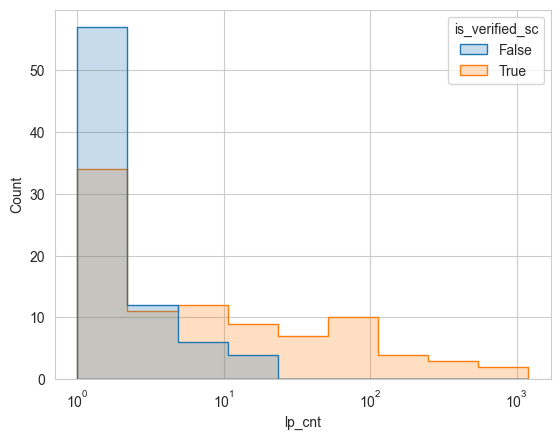

In [7]:
sns.histplot(x='lp_cnt', data=nft_lifetime_user_cnt, hue='is_verified_sc', log_scale=True, element="step")

<Axes: xlabel='lp_cnt', ylabel='Count'>

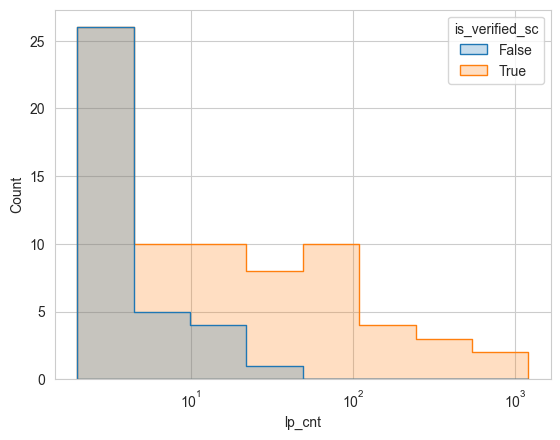

In [8]:
sns.histplot(x='lp_cnt', data=nft_lifetime_user_cnt_filtered_more_than_one, hue='is_verified_sc', log_scale=True, element="step")

In [7]:
sc_daily_obs_df_more_than_one_user = sc_daily_obs_df[sc_daily_obs_df["nf_position_manager_address"].isin(more_than_one_user)].copy()
sc_daily_obs_df_merged = sc_daily_obs_df.merge(nft_lifetime_user_cnt.rename(columns={'liquidity_provider': 'lp_cnt'}), on=["nf_position_manager_address", "pool_address", 'is_verified_sc'], how='left')
sc_daily_obs_df_merged_more_than_one_user = sc_daily_obs_df_more_than_one_user.merge(nft_lifetime_user_cnt.rename(columns={'liquidity_provider': 'lp_cnt'}), on=["nf_position_manager_address", "pool_address", 'is_verified_sc'], how='left')
sc_grouped_weekly_rois = sc_daily_obs_df.groupby(["pool_address","position_id", "nf_position_manager_address", "week"])["daily_overall_roi"].prod().reset_index().merge(nft_lifetime_user_cnt, on=["nf_position_manager_address", "pool_address"], how='left')

In [11]:
nft_type_mapping

,pool_address,nf_position_manager_address,is_verified_sc
0,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,True
283,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x4ef5947b7c8904c5a4094361c00b7f9421602e7b,False
334,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x7caec5e4a3906d0919895d113f7ed9b3a0cbf826,False
406,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x8d8b490fce6ca1a31752e7cfafa954bf30eb7ee2,True
911,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x98d149e227c75d38f623a9aa9f030fb222b3faa3,True
...,...,...,...
52624,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xd7bc18733ba69067d2af976011e54ec5d3239e7c,False
53166,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xdba8d7fd59a1406a5f101680230802b131c56aed,False
53594,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xdbcc892041558e3057d20303389624364863026b,True
53733,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xe2f731cc3609878b07bb00123041fd47a2b560ec,False


In [14]:
temp_position_level = sc_daily_obs_df.groupby(["pool_address","position_id", "nf_position_manager_address", "week"])["daily_overall_roi"].prod().reset_index().merge(sc_daily_obs_df.groupby(["pool_address","position_id", "nf_position_manager_address", "week"])["amount_last"].mean().reset_index(), on=["pool_address","position_id", "nf_position_manager_address", "week"], how='left').merge(nft_type_mapping, how='left', on=["pool_address", "nf_position_manager_address"])
temp_position_level.sort_values(by=["pool_address","nf_position_manager_address", "position_id", "week"], inplace=True)
temp_position_level["daily_overall_roi_lag"] = temp_position_level.groupby(["pool_address","nf_position_manager_address", "position_id"],sort=False)["daily_overall_roi"].shift(1)
temp_position_level.to_stata('0306test2.dta')

In [15]:
import os
from codes.shared_library.utils import get_parent
data_folder_path = os.path.join(get_parent(), "data")
daily_prices = pd.read_csv(os.path.join(data_folder_path, "raw", 'daily_pool_agg_results.csv'))
weekly_prices = pd.read_csv(os.path.join(data_folder_path, "raw", 'weekly_pool_agg_results.csv'))

In [25]:
temp_position_level['week'] = temp_position_level['week'].astype(str)
temp_position_level_filtered = temp_position_level[temp_position_level['week'] > '2021-05-30'].copy()
temp_position_level_filtered.merge(weekly_prices, how='left', on=['week', 'pool_address']).to_stata('0306test2.dta')

Index(['position_id', 'date', 'liquidity_mpz', 'net_liquidity', 'tick_lower',
       'tick_upper', 'current_tick', 'sqrtPrice', 'amount0', 'amount1', 'fee0',
       'fee1', 'price_range', 'active_perc', 'amount0_input', 'amount1_input',
       'amount0_output', 'amount1_output', 'low', 'high', 'open', 'close',
       'low_tick', 'high_tick', 'open_tick', 'close_tick', 'volume_crypto_abs',
       'volume_stable_abs', 'volume_crypto_net', 'volume_stable_net',
       'volume_usd', 'volume_crypto_net_usd', 'volume_stable_net_usd',
       'buying_crypto_trade_cnt', 'buying_stable_trade_cnt', 'pool_address',
       'amount', 'fee', 'amount_input', 'amount_output', 'amount0_last',
       'amount1_last', 'amount_last', 'total_amount0', 'total_amount1',
       'total_amount', 'nf_position_manager_address', 'is_verified_sc',
       'daily_overall_roi', 'daily_amount_roi', 'daily_fee_roi', 'week'],
      dtype='object')

In [28]:
weekly_input_info = sc_daily_obs_df.groupby(["pool_address","position_id", "nf_position_manager_address", "week"])["daily_overall_roi"].prod().reset_index().merge(sc_daily_obs_df.groupby(["pool_address","position_id", "nf_position_manager_address", "week"])["amount_last"].mean().reset_index(), on=["pool_address","position_id", "nf_position_manager_address", "week"], how='left')

count    1.345500e+04
mean     3.643473e+05
std      1.195206e+06
min      9.184052e+00
25%      8.410102e+02
50%      2.000000e+04
75%      2.615982e+05
max      5.024178e+07
Name: amount_last, dtype: float64

In [51]:
weekly_roi_info = sc_daily_obs_df.groupby(["pool_address","position_id", "nf_position_manager_address", "week"])["daily_overall_roi"].prod().reset_index().merge(sc_daily_obs_df.groupby(["pool_address","position_id", "nf_position_manager_address", "week"])["amount_last"].mean().reset_index(), on=["pool_address","position_id", "nf_position_manager_address", "week"], how='left')
weekly_roi_info["amount_new"] = weekly_roi_info["daily_overall_roi"] * weekly_roi_info["amount_last"]
per_sc_per_week_info_new = weekly_roi_info.groupby(["pool_address","nf_position_manager_address", "week"])["amount_last"].sum().reset_index().merge(weekly_roi_info.groupby(["pool_address","nf_position_manager_address", "week"])["amount_new"].sum().reset_index(), how='left', on=["pool_address","nf_position_manager_address", "week"]).merge(nft_by_week_user_cnt, how='left', on=["pool_address","nf_position_manager_address", "week"]).merge(new_sc_user_cnt, how='left', on=["pool_address","nf_position_manager_address", "week"])
per_sc_per_week_info_new["overall_roi"] = per_sc_per_week_info_new["amount_new"] / per_sc_per_week_info_new["amount_last"]
per_sc_per_week_info_new.sort_values(["pool_address","nf_position_manager_address", "week"], inplace=True)
per_sc_per_week_info_new['lp_cnt_fixed'] = per_sc_per_week_info_new.groupby(["pool_address","nf_position_manager_address"],sort=False)["lp_cnt"].ffill()
per_sc_per_week_info_new['is_verified_sc_fixed'] = per_sc_per_week_info_new.groupby(["pool_address","nf_position_manager_address"],sort=False)["is_verified_sc"].ffill()
per_sc_per_week_info_new["new_sc_user"] = per_sc_per_week_info_new["sc_new"].fillna(0)

per_sc_per_week_info_new["daily_overall_roi_lag"] = per_sc_per_week_info_new.groupby(["pool_address","nf_position_manager_address"],sort=False)["overall_roi"].shift(1)
per_sc_per_week_info_new["daily_overall_roi_lag2"] = per_sc_per_week_info_new.groupby(["pool_address","nf_position_manager_address"],sort=False)["overall_roi"].shift(2)

per_sc_per_week_info_new["new_sc_user_cumsum"] = per_sc_per_week_info_new.groupby(["pool_address","nf_position_manager_address"],sort=False)["new_sc_user"].cumsum()

per_sc_per_week_info = sc_daily_obs_df.groupby(["pool_address","position_id", "nf_position_manager_address", "week"])["daily_overall_roi"].prod().reset_index().groupby(["pool_address","nf_position_manager_address", "week"])["daily_overall_roi"].mean().reset_index().merge(nft_by_week_user_cnt, how='left', on=["pool_address","nf_position_manager_address", "week"]).merge(new_sc_user_cnt, how='left', on=["pool_address","nf_position_manager_address", "week"])
per_sc_per_week_info.sort_values(["pool_address","nf_position_manager_address", "week"], inplace=True)
per_sc_per_week_info['lp_cnt_fixed'] = per_sc_per_week_info.groupby(["pool_address","nf_position_manager_address"],sort=False)["lp_cnt"].ffill()
per_sc_per_week_info['is_verified_sc_fixed'] = per_sc_per_week_info.groupby(["pool_address","nf_position_manager_address"],sort=False)["is_verified_sc"].ffill()
per_sc_per_week_info["new_sc_user"] = per_sc_per_week_info["sc_new"].fillna(0)

per_sc_per_week_info["daily_overall_roi_lag"] = per_sc_per_week_info.groupby(["pool_address","nf_position_manager_address"],sort=False)["daily_overall_roi"].shift(1)
per_sc_per_week_info["daily_overall_roi_lag2"] = per_sc_per_week_info.groupby(["pool_address","nf_position_manager_address"],sort=False)["daily_overall_roi"].shift(2)

per_sc_per_week_info["new_sc_user_cumsum"] = per_sc_per_week_info.groupby(["pool_address","nf_position_manager_address"],sort=False)["new_sc_user"].cumsum()

In [86]:
weekly_agg_pool_level = weekly_agg_prices[["time", "pool_address", 'buy_trades', 'sell_trades',
       'num_trades', 'unique_txs', 'tx_users', 'net_stable', 'net_token',
       'net_token_usd', 'vol_token', 'vol_token_usd', 'vol_stable',
       'price_high', 'price_low', 'price_open', 'price_close', 'price_std',
       'price_avg']].copy()
weekly_agg_pool_level['week'] = (pd.to_datetime(weekly_agg_pool_level['time']) - pd.tseries.offsets.Day()).astype(str)

In [63]:
position_count_table = sc_daily_obs_df.groupby(["nf_position_manager_address"])["position_id"].nunique()
more_than_one_pos_scs = position_count_table[position_count_table > 1].index.tolist()

In [127]:
more_than_one_pos_scs

['0x026ebe349f96077660138f0e7d7d448a3320c866',
 '0x0507856599f598d2aa070c4286d296cd7ef7af9a',
 '0x09fb2f78bc8b08372b260a3e7ceba009e89c05d7',
 '0x0f7b93c7b855e667fe4ae29f45d473803727ea98',
 '0x12804580c15f4050dda61d44afc94623198848bc',
 '0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22',
 '0x12f64097e2815b1089296eaa3d9f165674389db9',
 '0x168a47b6d6893ca572a01cb0c740fc6fd7364c2d',
 '0x17f031bafc1149092026bff52b0d060b16523cd1',
 '0x1860ff27248a8b1cfe87f1951575426ca2c75693',
 '0x1ae1df64bf695ea1f1a7ebdc280af712340f09a9',
 '0x1cd7105d467ac3d734797ce9071ab7a83a28dff7',
 '0x1cf3e6f18223a1f2a445f2cd60538af380e98074',
 '0x215852cc03263496969d8a5daa96f569b176771f',
 '0x2653dd498c241033c6d19282c61d806434f1859a',
 '0x26745bcedb8d1a079f370088af9089ae478de7fa',
 '0x26f655245589eac80f3f8e288a77e25899674a49',
 '0x275918144004f48b9eacc75820a3ba7f0a96a591',
 '0x29ddf2bb839b900056ca1aa3634b5ef7058a4cdb',
 '0x29ef20dd2d324d75fdd54bb722fad06e1c66a619',
 '0x29f357ade17cc4d92fb085412ddf8547de14ea38',
 '0x2c381c46a

In [120]:
rename_map = {
    "nf_position_manager_address": "sc_id",
    "amount_new": "amount",
    "is_verified_sc_fixed": "is_verified_sc",
    "lp_cnt_fixed": "lp_cnt"
}
per_sc_per_week_info_new['is_verified_sc_fixed'] = per_sc_per_week_info_new['is_verified_sc_fixed']==True
per_sc_per_week_info_new['week'] = per_sc_per_week_info_new['week'].astype(str)
per_sc_per_week_info_new["more_than_one_pos_overall"] = per_sc_per_week_info_new["nf_position_manager_address"].isin(more_than_one_pos_scs)
per_sc_per_week_info_new["more_than_one_user_overall"] = per_sc_per_week_info_new["nf_position_manager_address"].isin(more_than_one_user)
per_sc_per_week_info_new_cols_to_keep = ['pool_address', 'week', 'nf_position_manager_address', "overall_roi", 'amount_last', 'amount_new', 'is_verified_sc_fixed', 'lp_cnt_fixed', 'new_sc_user', 'more_than_one_pos_overall', 'more_than_one_user_overall']

sc_daily_obs_df_copy = sc_daily_obs_df.copy()
sc_daily_obs_df_copy['week']= sc_daily_obs_df_copy['week'].astype(str)

per_sc_per_week_info_new[per_sc_per_week_info_new_cols_to_keep].merge(sc_daily_obs_df_copy.groupby(["pool_address","nf_position_manager_address", "week"])[["amount_input", "amount_output"]].sum().reset_index(), how='left', on =["pool_address","nf_position_manager_address", "week"]).rename(columns=rename_map).merge(weekly_agg_pool_level.drop(columns=['time']), how='left', on=['week', 'pool_address']).to_stata('20240307_sc.dta')

In [122]:
for item in weekly_agg_pool_level.columns:
    print(item, end = " ")

time pool_address buy_trades sell_trades num_trades unique_txs tx_users net_stable net_token net_token_usd vol_token vol_token_usd vol_stable price_high price_low price_open price_close price_std price_avg week 

In [126]:
weekly_agg_pool_level.drop(columns=['time']).to_csv("20240308_pool_week_vars.csv", index=False)

In [96]:
per_sc_per_week_info_new.merge(weekly_agg_pool_level, how='left', on=['week', 'pool_address']).columns

Index(['pool_address', 'nf_position_manager_address', 'week', 'amount_last',
       'amount_new', 'lp_cnt', 'is_verified_sc', 'sc_new', 'overall_roi',
       'lp_cnt_fixed', 'is_verified_sc_fixed', 'new_sc_user',
       'daily_overall_roi_lag', 'daily_overall_roi_lag2', 'new_sc_user_cumsum',
       'more_than_one_pos_overall', 'time', 'buy_trades', 'sell_trades',
       'num_trades', 'unique_txs', 'tx_users', 'net_stable', 'net_token',
       'net_token_usd', 'vol_token', 'vol_token_usd', 'vol_stable',
       'price_high', 'price_low', 'price_open', 'price_close', 'price_std',
       'price_avg'],
      dtype='object')

In [97]:
per_sc_per_week_info_new.merge(weekly_agg_pool_level, how='left', on=['week', 'pool_address'])

,pool_address,nf_position_manager_address,week,amount_last,amount_new,lp_cnt,is_verified_sc,sc_new,overall_roi,lp_cnt_fixed,...,net_token_usd,vol_token,vol_token_usd,vol_stable,price_high,price_low,price_open,price_close,price_std,price_avg
0,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-03-27,75164.259161,75587.349661,5.0,True,5.0,1.005629,5.0,...,-7299382.98,175856.710601,5.959015e+08,5.967735e+08,3639.271440,3201.938886,3292.792618,3522.791660,70.216506,3397.605149
1,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-04-03,184537.938188,181324.082188,4.0,True,3.0,0.982584,4.0,...,8999466.07,169819.320017,5.624733e+08,5.600174e+08,3575.390365,3144.698554,3519.238045,3198.141936,112.950723,3310.773158
2,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-04-10,199361.229421,193405.320659,1.0,True,0.0,0.970125,1.0,...,8972523.55,258694.937873,7.952795e+08,7.874247e+08,3213.397798,2886.330559,3201.323786,2992.125713,47.939210,3049.531656
3,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-04-17,161402.195209,157699.369794,NaN,NaN,NaN,0.977058,1.0,...,3196518.72,224303.720038,6.781215e+08,6.763412e+08,3176.332713,2727.857358,2989.149859,2921.858470,71.686529,3017.162313
4,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-04-24,156005.487492,148107.832297,NaN,NaN,NaN,0.949376,1.0,...,1207842.79,221662.391248,6.345194e+08,6.309287e+08,3031.514274,2388.044941,2921.894868,2824.994014,71.095417,2863.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xe2f731cc3609878b07bb00123041fd47a2b560ec,2021-10-03,1225.514075,1239.800327,NaN,NaN,NaN,1.011657,5.0,...,2010192.94,208691.427965,7.321282e+08,7.307795e+08,3668.514385,3276.991834,3412.683225,3409.256687,95.568443,3501.577021
4966,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xe2f731cc3609878b07bb00123041fd47a2b560ec,2021-10-10,1225.905068,1225.905068,1.0,False,0.0,1.000000,1.0,...,-57748467.05,185521.026498,6.800718e+08,6.788530e+08,3970.728212,3379.923067,3406.321959,3852.553905,165.614521,3667.474968
4967,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb,2021-12-12,28912.040986,28855.764300,2.0,True,2.0,0.998054,2.0,...,36659176.13,290552.489482,1.135739e+09,1.131912e+09,4125.218689,3651.146991,4125.218689,3917.574600,103.680013,3889.316502
4968,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb,2021-12-19,43513.230710,43550.533250,2.0,True,0.0,1.000857,2.0,...,-32526433.83,148269.389521,5.912162e+08,5.909287e+08,4150.062907,3757.107909,3911.414821,4088.397917,89.847405,3994.978061


In [88]:
weekly_per_position = weekly_roi_info.merge(nft_type_mapping, how='left', on=['nf_position_manager_address', 'pool_address'])
weekly_per_position['week'] = weekly_per_position['week'].astype(str)
weekly_per_position.merge(weekly_agg_pool_level, how='left', on=['week', 'pool_address']).to_stata('0307_approach3.dta')

In [92]:
weekly_agg_pool_level

Index(['time', 'pool_address', 'buy_trades', 'sell_trades', 'num_trades',
       'unique_txs', 'tx_users', 'net_stable', 'net_token', 'net_token_usd',
       'vol_token', 'vol_token_usd', 'vol_stable', 'price_high', 'price_low',
       'price_open', 'price_close', 'price_std', 'price_avg', 'week'],
      dtype='object')

In [94]:
rename_map = {
    "nf_position_manager_address": "sc_id",
    "daily_overall_roi": "overall_roi",
    "amount_new": "amount",
}
weekly_per_position_cols_to_keep = ['pool_address', 'week', 'sc_id', 'position_id', "overall_roi", 'amount_last', 'amount', 'is_verified_sc', 'num_trades', 'buy_trades', 'sell_trades',
       'unique_txs', 'tx_users', 'net_stable', 'net_token', 'net_token_usd',
       'vol_token', 'vol_token_usd', 'vol_stable', 'price_high', 'price_low',
       'price_open', 'price_close', 'price_std', 'price_avg']
weekly_per_position.merge(weekly_agg_pool_level, how='left', on=['week', 'pool_address']).rename(columns=rename_map)[weekly_per_position_cols_to_keep].to_stata('20240307_position_level.dta')

In [71]:
per_sc_per_week_info_new["nf_position_manager_address"].isin(more_than_one_pos_scs)

0       True
1       True
2       True
3       True
4       True
        ... 
4965    True
4966    True
4967    True
4968    True
4969    True
Name: nf_position_manager_address, Length: 4970, dtype: bool

In [61]:
per_sc_per_week_info['is_verified_sc_fixed'] = per_sc_per_week_info_new['is_verified_sc_fixed']==True
per_sc_per_week_info['week'] = per_sc_per_week_info_new['week'].astype(str)
per_sc_per_week_info[['pool_address', 'nf_position_manager_address', 'week', 'daily_overall_roi',
       'lp_cnt_fixed', 'is_verified_sc_fixed', 'new_sc_user',
       'daily_overall_roi_lag', 'daily_overall_roi_lag2', 'new_sc_user_cumsum']].merge(weekly_agg_pool_level, how='left', on=['week', 'pool_address']).to_stata('0307_approach2.dta')

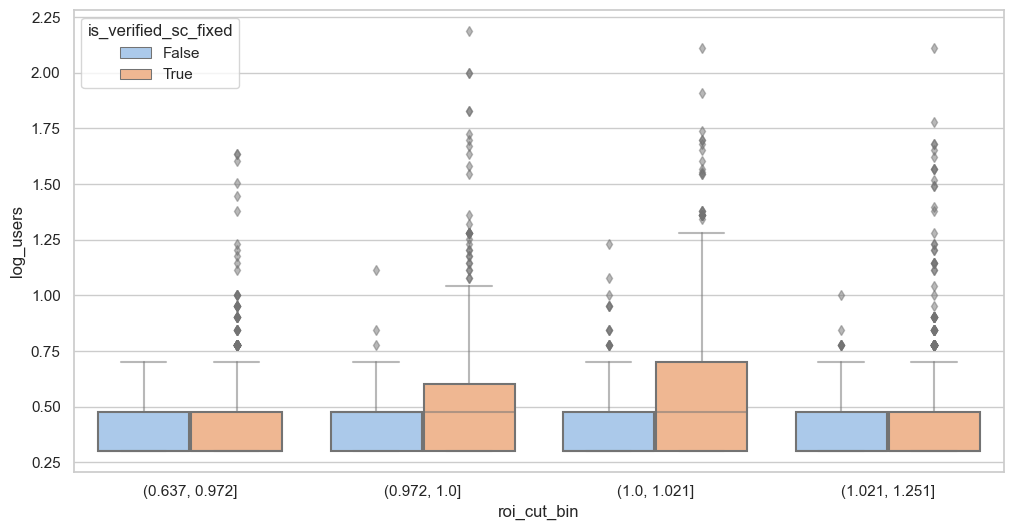

In [12]:
def winsorize_series(group):
    return mstats.winsorize(group, limits=[0.05,0.05])
#df = per_sc_per_week_info.dropna(subset=['daily_overall_roi_lag']).copy()
df = per_sc_per_week_info_new.copy()
df["daily_overall_roi"] = df["overall_roi"]
q_low = df["daily_overall_roi"].quantile(0.01)
q_hi  = df["daily_overall_roi"].quantile(0.99)
q1 = df["daily_overall_roi"].quantile(0.1)
q2 = df["daily_overall_roi"].quantile(0.2)
q3 = df["daily_overall_roi"].quantile(0.3)
q4 = df["daily_overall_roi"].quantile(0.4)
q5 = df["daily_overall_roi"].quantile(0.5)
q6 = df["daily_overall_roi"].quantile(0.6)
q7 = df["daily_overall_roi"].quantile(0.7)
q8 = df["daily_overall_roi"].quantile(0.8)
q9 = df["daily_overall_roi"].quantile(0.9)

q_min = df["daily_overall_roi"].min()
q_max = df["daily_overall_roi"].max()
first_quantile = df["daily_overall_roi"].quantile(0.25)
thrid_quantile = df["daily_overall_roi"].quantile(0.75)
median = df["daily_overall_roi"].quantile(0.5)
df['lp_cnt_winsored'] = df.groupby('week')['lp_cnt_fixed'].transform(winsorize_series)
df['new_user_winsord'] = df.groupby('week')['new_sc_user_cumsum'].transform(winsorize_series)

#many_users_nft = nft_by_week_user_cnt

#df_filtered = df[(df["daily_overall_roi"] < q_hi) & (df["daily_overall_roi"] > q_low)].copy()
#df_filtered = df_filtered[df_filtered["lp_cnt_fixed"] <=25].copy()
df_filtered = df[df["nf_position_manager_address"].isin(more_than_one_user)].copy()

roi_bins=[q_min, first_quantile, median, thrid_quantile, q_max]
#roi_bins = [q_low, q2, q4, q5, q6, q8, q_hi]
#roi_bins=[q1, q2, q3, q4, median, q6, q7, q8, q9, q_hi]
df_filtered["roi_cut_bin"] = pd.cut(df_filtered["daily_overall_roi"], bins=roi_bins, include_lowest=True, right=True)
sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="whitegrid", palette="pastel")
df_filtered["log_users"] = np.log10(df_filtered["lp_cnt_winsored"] + 1)
df_filtered["log_new_users"] = np.log10(df_filtered["new_sc_user"] + 1)
df_filtered["log_cumulative_new_users"] = np.log10(df_filtered["new_sc_user_cumsum"] + 1)
ax = sns.boxplot(x='roi_cut_bin', y='log_users', data=df_filtered, hue='is_verified_sc_fixed')
for line in ax.lines:
    line.set_alpha(0.5)
plt.show()

In [13]:
grouped_by_week_cnt_bins = df_filtered.groupby(["week", "roi_cut_bin", "is_verified_sc_fixed"])["nf_position_manager_address"].nunique().reset_index()
grouped_by_week_cnt_bins["roi_cut_bin_str"] = grouped_by_week_cnt_bins["roi_cut_bin"].astype(str)
grouped_by_roi_cnt_bins = df_filtered.groupby(["roi_cut_bin", "is_verified_sc_fixed"])["nf_position_manager_address"].nunique().reset_index()
grouped_by_week_cnt_bins_top25 = grouped_by_week_cnt_bins[grouped_by_week_cnt_bins["roi_cut_bin_str"] == '(1.021, 1.251]'].copy()

In [14]:
# First, group by roi cut bins
df_filtered["roi_by_week_rank"] = df_filtered.groupby(['week', 'pool_address'])['daily_overall_roi'].rank(pct=True)
df_filtered["roi_overall_rank"] = df_filtered.groupby(['pool_address'])['daily_overall_roi'].rank(pct=True)

<Axes: xlabel='is_verified_sc_fixed', ylabel='roi_by_week_rank'>

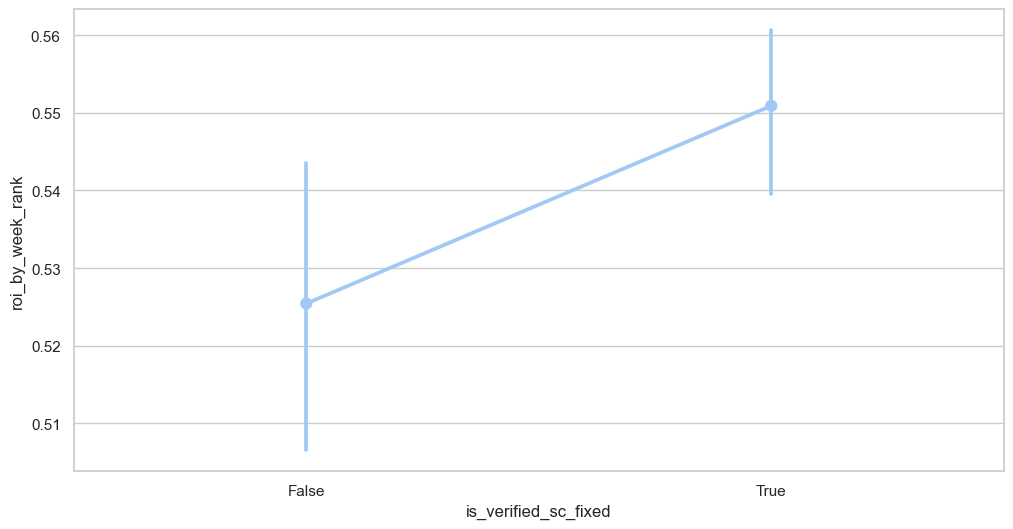

In [15]:
sns.pointplot(data=df_filtered, y="roi_by_week_rank", x="is_verified_sc_fixed")

<Axes: xlabel='week', ylabel='percentage'>

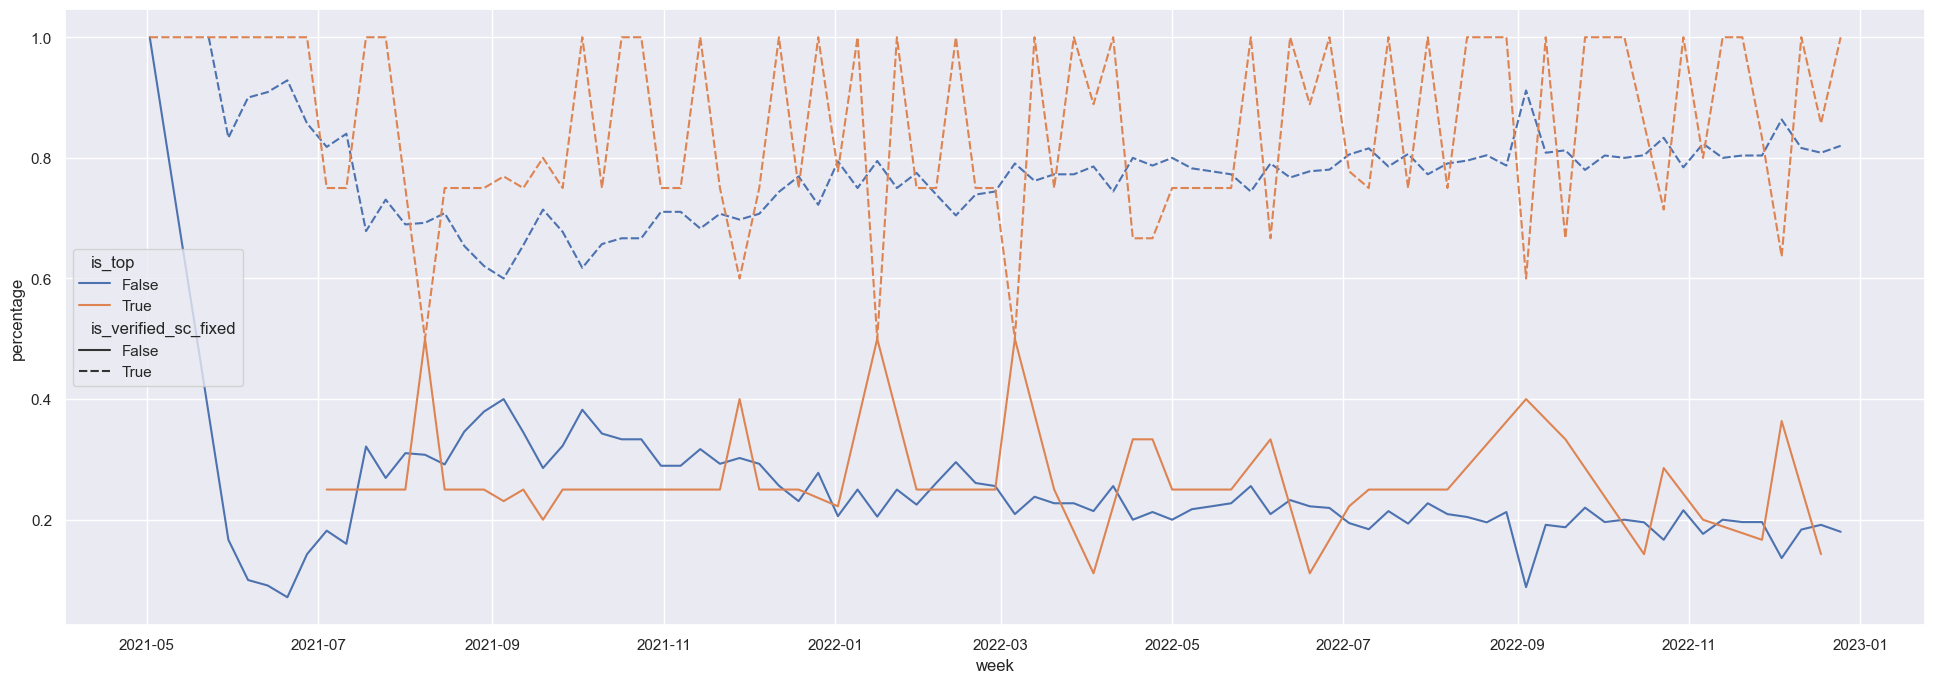

In [16]:
top25_df = df_filtered.merge(df_filtered.groupby(['pool_address','week'])["daily_overall_roi"].quantile(0.95).reset_index().rename(columns={"daily_overall_roi":"top_25_this_week"}), on= ['week', 'pool_address'], how='left')
top25_df["is_top"] = top25_df["daily_overall_roi"] >= top25_df["top_25_this_week"]
by_week_sc_cnt = top25_df.groupby(["week"])["nf_position_manager_address"].nunique().reset_index()
top_only_df = top25_df[top25_df["is_top"]].copy()
by_week_top_25_cnt = top_only_df.groupby(["week"])["nf_position_manager_address"].nunique().reset_index()
by_week_top_25_and_verified_cnt = top_only_df[top_only_df["is_verified_sc_fixed"]].copy().groupby(["week"])["nf_position_manager_address"].nunique().reset_index()
#top25_df_only = top25_df.copy()
total_cnt_df = top25_df.groupby(["week", "is_verified_sc_fixed", "is_top"])["nf_position_manager_address"].nunique().reset_index().merge(top25_df.groupby(["week", "is_top"])["nf_position_manager_address"].nunique().reset_index().rename(columns={"nf_position_manager_address":"total_cnt"}), on=["week", "is_top"], how='left')
total_cnt_df["percentage"] = total_cnt_df["nf_position_manager_address"] / total_cnt_df["total_cnt"]
sns.set(rc={'figure.figsize':(24,8)})
sns.lineplot(data=total_cnt_df, x="week", y="percentage", hue='is_top', style="is_verified_sc_fixed")

<Axes: xlabel='week', ylabel='daily_overall_roi'>

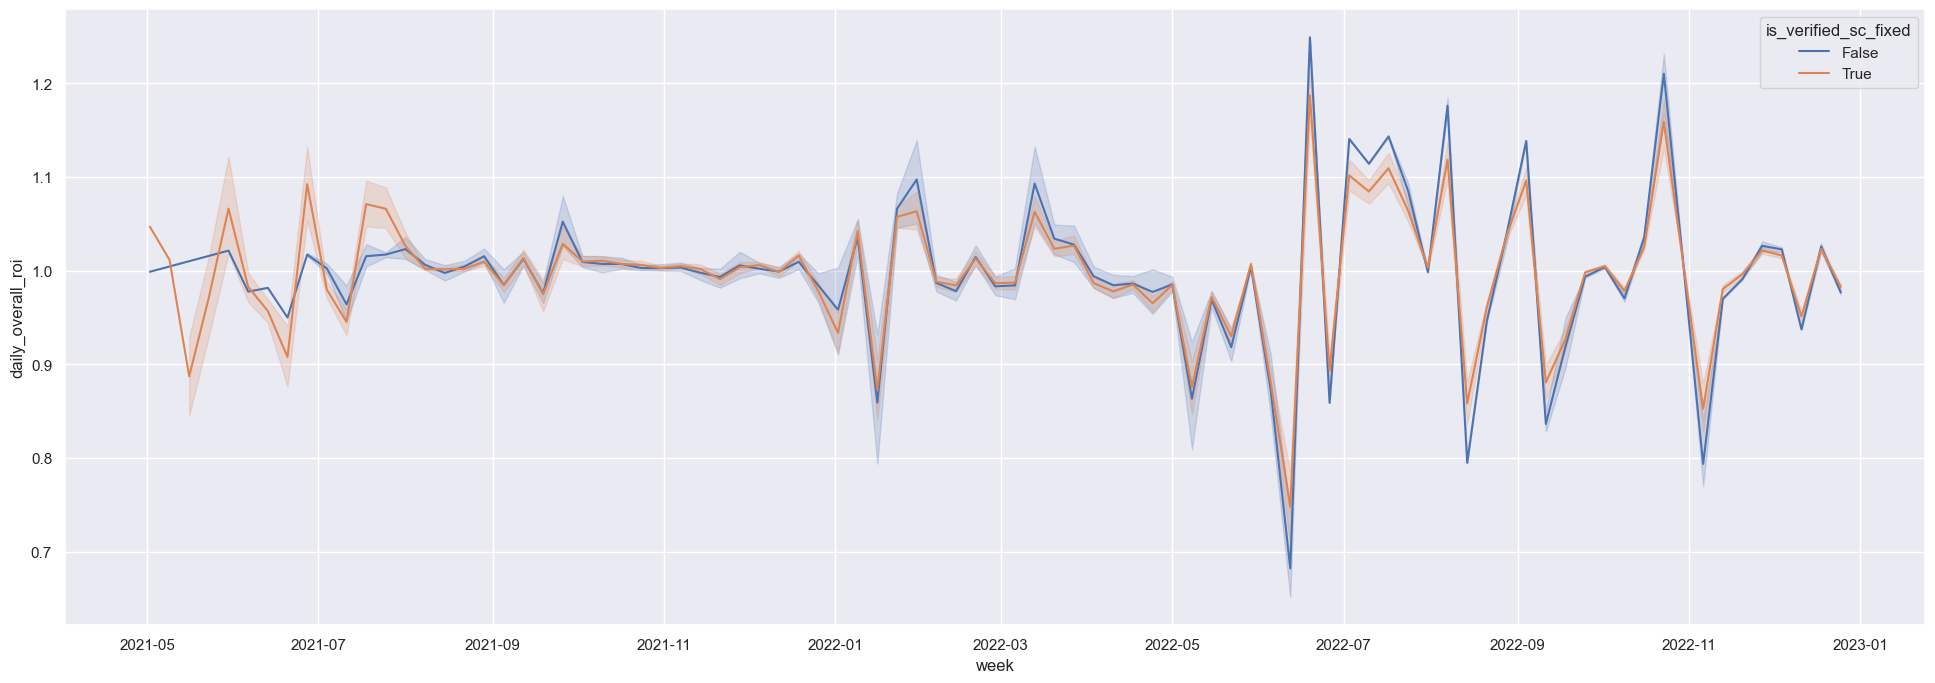

In [17]:
sns.lineplot(x="week", y='daily_overall_roi', data=df_filtered, hue='is_verified_sc_fixed')

<Axes: xlabel='week', ylabel='cond_prob'>

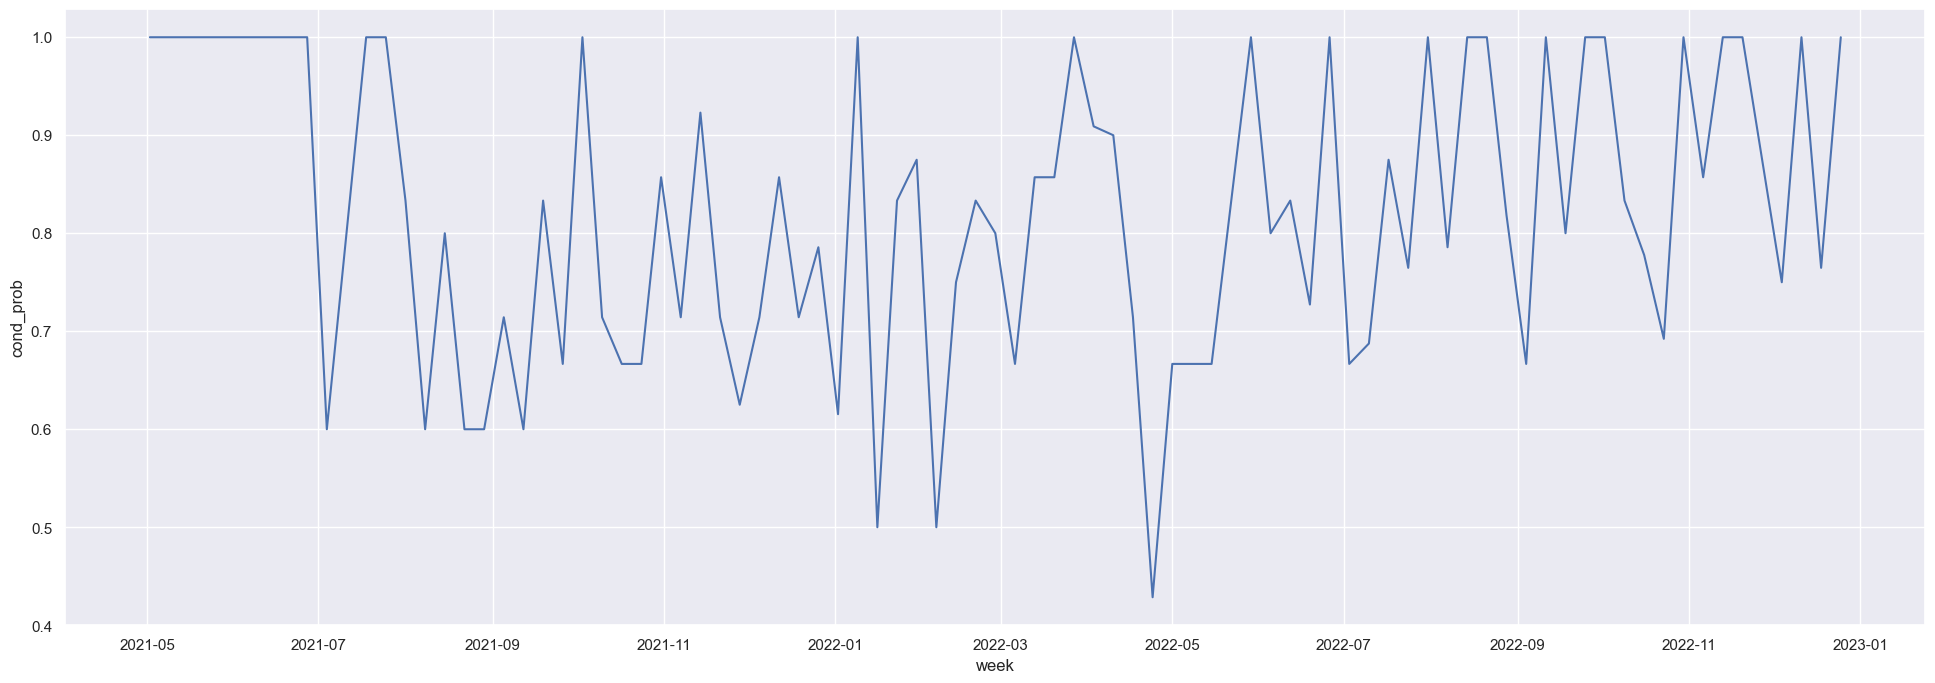

In [18]:
top25_df = df_filtered.merge(df_filtered.groupby(['pool_address','week'])["daily_overall_roi"].quantile(0.90).reset_index().rename(columns={"daily_overall_roi":"top_25_this_week"}), on= ['week', 'pool_address'], how='left')
top25_df["is_top"] = top25_df["daily_overall_roi"] >= top25_df["top_25_this_week"]
#by_week_sc_cnt = top25_df.groupby(["week"])["nf_position_manager_address"].nunique().reset_index().rename(columns={"nf_position_manager_address":"total_cnt"})
top_only_df = top25_df[top25_df["is_top"]].copy()
by_week_top_25_cnt = top_only_df.groupby(["week"])["nf_position_manager_address"].nunique().reset_index().rename(columns={"nf_position_manager_address":"top_cnt"})
by_week_top_25_and_verified_cnt = top_only_df[top_only_df["is_verified_sc_fixed"]].copy().groupby(["week"])["nf_position_manager_address"].nunique().reset_index().rename(columns={"nf_position_manager_address":"top_and_verified_cnt"})
cnt_table = by_week_top_25_and_verified_cnt.merge(by_week_top_25_cnt, on=['week'])
cnt_table["cond_prob"] = cnt_table["top_and_verified_cnt"] / cnt_table["top_cnt"]
sns.set(rc={'figure.figsize':(24,8)})
sns.lineplot(cnt_table, x='week', y='cond_prob')

In [19]:
cnt_table = by_week_top_25_and_verified_cnt.merge(by_week_top_25_cnt, on=['week'])
cnt_table["cond_prob"] = cnt_table["top_and_verified_cnt"] / cnt_table["top_cnt"]

<Axes: xlabel='week', ylabel='cond_prob'>

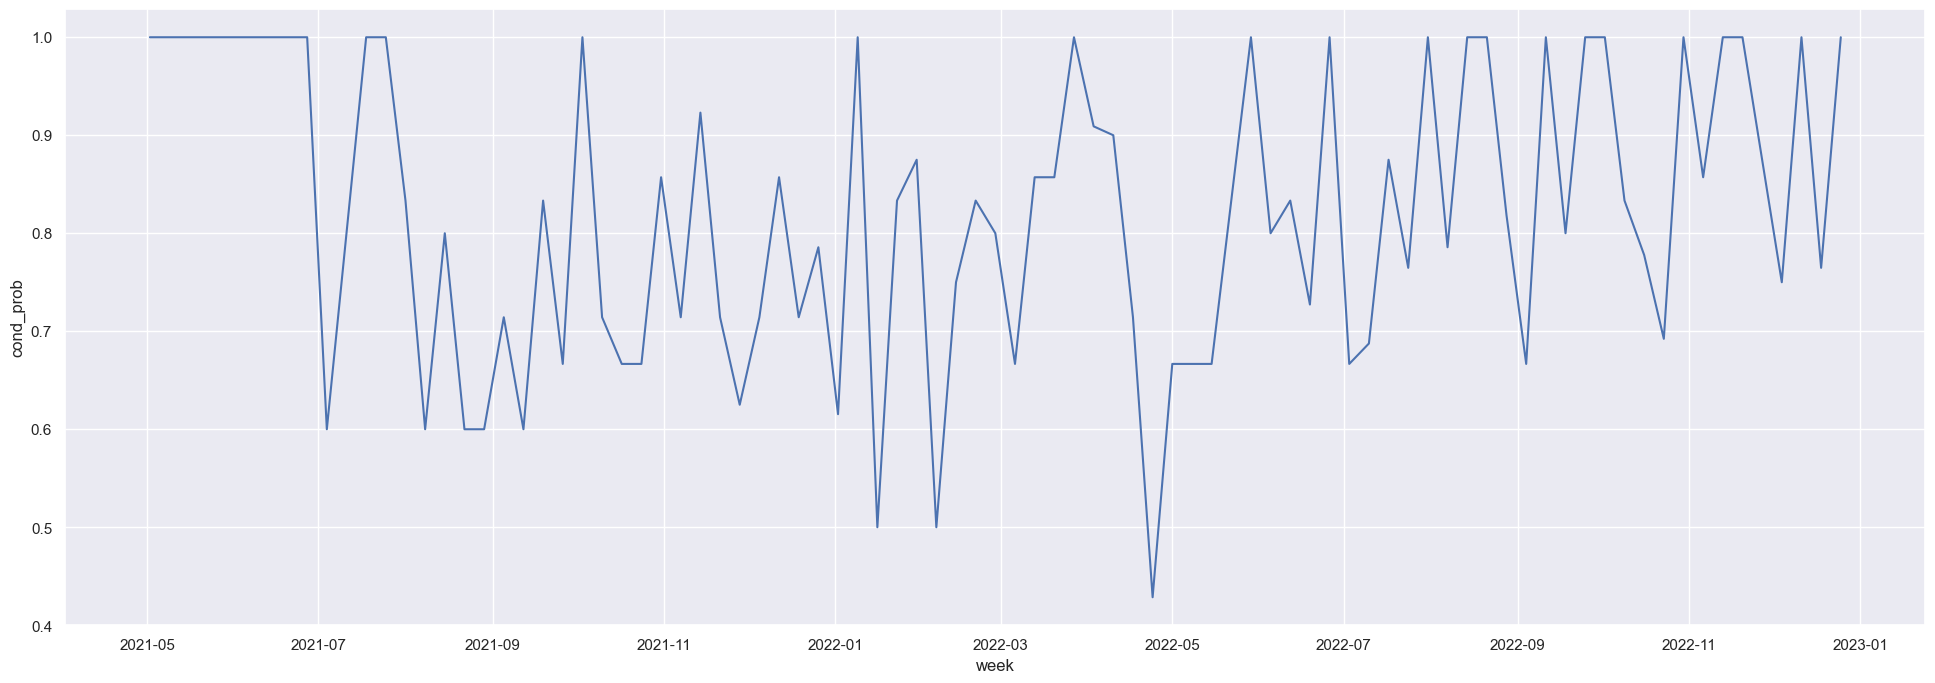

In [20]:
sns.set(rc={'figure.figsize':(24,8)})
sns.lineplot(cnt_table, x='week', y='cond_prob')

In [21]:
grouped_by_week_cnt_bins_total = top25_df.groupby(["week", "roi_cut_bin"])["nf_position_manager_address"].nunique().reset_index()

In [22]:
grouped_by_week_cnt_bins_total

,week,roi_cut_bin,nf_position_manager_address
0,2021-05-02,"(0.637, 0.972]",0
1,2021-05-02,"(0.972, 1.0]",1
2,2021-05-02,"(1.0, 1.021]",0
3,2021-05-02,"(1.021, 1.251]",1
4,2021-05-09,"(0.637, 0.972]",0
...,...,...,...
343,2022-12-18,"(1.021, 1.251]",37
344,2022-12-25,"(0.637, 0.972]",0
345,2022-12-25,"(0.972, 1.0]",54
346,2022-12-25,"(1.0, 1.021]",0


In [23]:
grouped_by_week_cnt_bins_top25 = grouped_by_week_cnt_bins[grouped_by_week_cnt_bins["roi_cut_bin_str"] == '(1.021, 1.251]'].copy()

In [24]:
top25_data = grouped_by_week_cnt_bins_top25.merge(grouped_by_week_cnt_bins_total.rename(columns={"nf_position_manager_address":"total_cnt"}), how='left', on=["week", "roi_cut_bin"])
top25_data["percentage"] = top25_data["nf_position_manager_address"] / top25_data["total_cnt"]

In [25]:
top25_data

,week,roi_cut_bin,is_verified_sc_fixed,nf_position_manager_address,roi_cut_bin_str,total_cnt,percentage
0,2021-05-02,"(1.021, 1.251]",False,0,"(1.021, 1.251]",1,0.000000
1,2021-05-02,"(1.021, 1.251]",True,1,"(1.021, 1.251]",1,1.000000
2,2021-05-09,"(1.021, 1.251]",False,0,"(1.021, 1.251]",0,NaN
3,2021-05-09,"(1.021, 1.251]",True,0,"(1.021, 1.251]",0,NaN
4,2021-05-16,"(1.021, 1.251]",False,0,"(1.021, 1.251]",0,NaN
...,...,...,...,...,...,...,...
169,2022-12-11,"(1.021, 1.251]",True,0,"(1.021, 1.251]",0,NaN
170,2022-12-18,"(1.021, 1.251]",False,9,"(1.021, 1.251]",37,0.243243
171,2022-12-18,"(1.021, 1.251]",True,28,"(1.021, 1.251]",37,0.756757
172,2022-12-25,"(1.021, 1.251]",False,0,"(1.021, 1.251]",0,NaN


<Axes: xlabel='week', ylabel='percentage'>

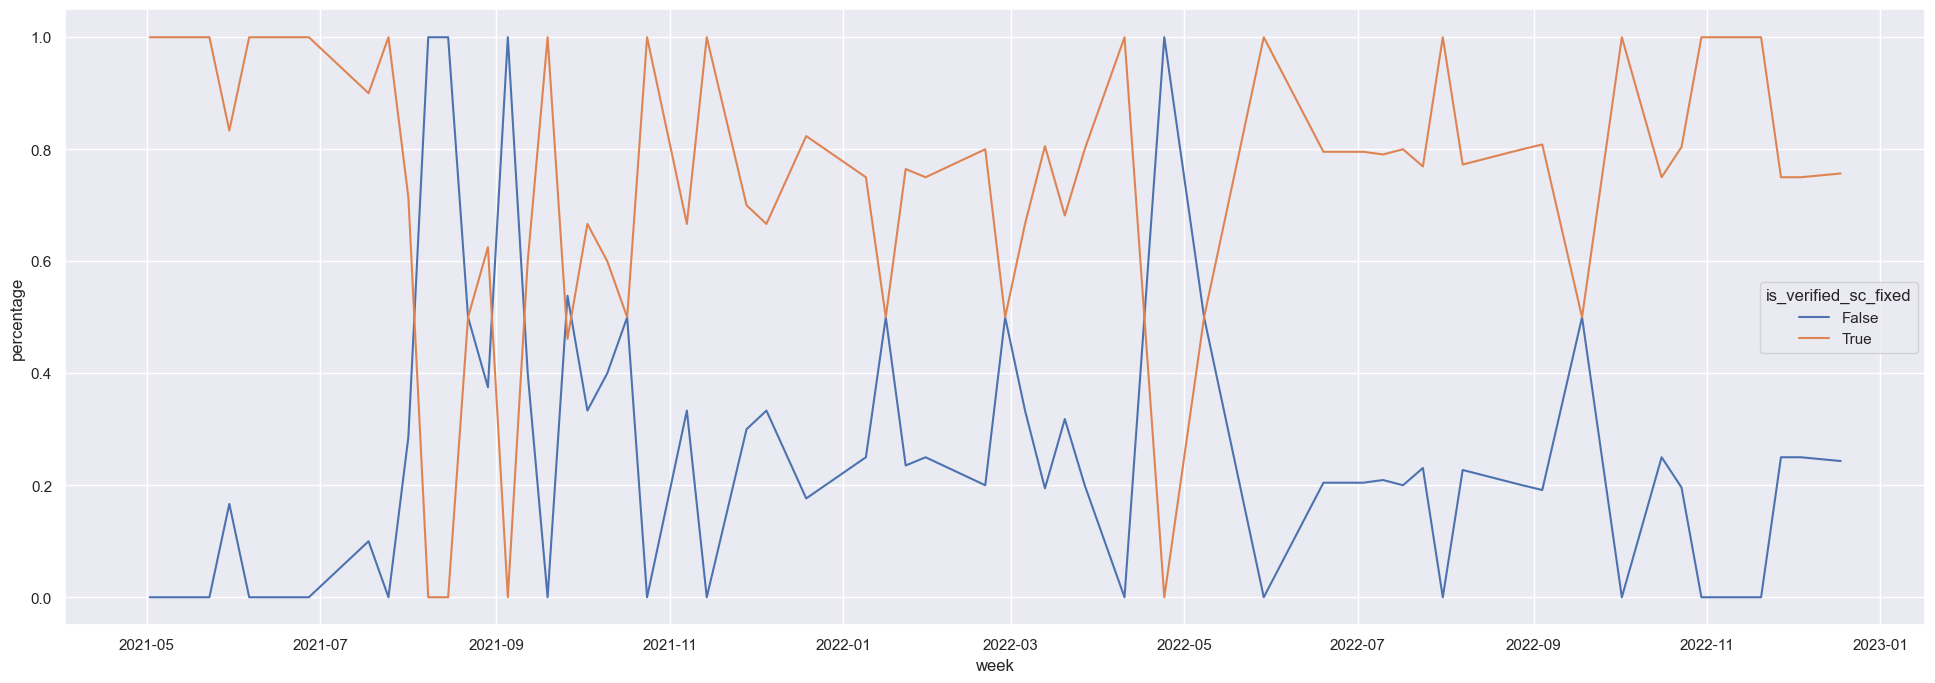

In [26]:
sns.set(rc={'figure.figsize':(24,8)})
sns.lineplot(data=top25_data, x="week", y="percentage", hue='is_verified_sc_fixed')

In [27]:
grouped_by_roi_cnt_bins

,roi_cut_bin,is_verified_sc_fixed,nf_position_manager_address
0,"(0.637, 0.972]",False,23
1,"(0.637, 0.972]",True,55
2,"(0.972, 1.0]",False,25
3,"(0.972, 1.0]",True,63
4,"(1.0, 1.021]",False,32
5,"(1.0, 1.021]",True,64
6,"(1.021, 1.251]",False,23
7,"(1.021, 1.251]",True,60


In [28]:
df["daily_overall_roi"].min()

0.6383776142684299

In [29]:
nft_by_week_user_cnt[nft_by_week_user_cnt['lp_cnt'] < 25]

,pool_address,nf_position_manager_address,week,lp_cnt,is_verified_sc
0,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-03-27,5,True
1,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-04-03,4,True
2,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-04-10,1,True
3,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-05-01,3,True
4,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x12cc705bdd9ff7cd3bcddafe1cabfce9a182aa22,2022-05-08,5,True
...,...,...,...,...,...
1603,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xe2f731cc3609878b07bb00123041fd47a2b560ec,2021-10-10,1,False
1604,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb,2021-12-12,2,True
1605,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb,2021-12-19,2,True
1606,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb,2021-12-26,3,True


In [67]:
per_sc_per_week_info.columns

Index(['pool_address', 'nf_position_manager_address', 'week',
       'daily_overall_roi', 'lp_cnt', 'is_verified_sc', 'sc_new',
       'lp_cnt_fixed', 'is_verified_sc_fixed', 'new_sc_user',
       'daily_overall_roi_lag', 'new_sc_user_cumsum'],
      dtype='object')

In [135]:

per_sc_per_week_info_temp = per_sc_per_week_info_new.copy()
#per_sc_per_week_info_temp = per_sc_per_week_info_temp[per_sc_per_week_info_temp["pool_address"]!='0x11b815efb8f581194ae79006d24e0d814b7697f6']
per_sc_per_week_info_temp['daily_overall_roi'] = per_sc_per_week_info_temp['overall_roi']
q05 = per_sc_per_week_info_temp["daily_overall_roi"].quantile(0.05)
q95 = per_sc_per_week_info_temp["daily_overall_roi"].quantile(0.95)
q25 = per_sc_per_week_info_temp["daily_overall_roi"].quantile(0.25)
q50 = per_sc_per_week_info_temp["daily_overall_roi"].quantile(0.50)
q75 = per_sc_per_week_info_temp["daily_overall_roi"].quantile(0.75)
roi_bins=[0.5, q25, q50, q75, 1.26]
per_sc_per_week_info_temp["roi_cut_bin"] = pd.cut(per_sc_per_week_info_temp["daily_overall_roi"], bins=roi_bins, include_lowest=True, right=True)

In [101]:
per_sc_per_week_info_temp["weekly_rank"] = per_sc_per_week_info_temp.groupby(["pool_address", "week"])["daily_overall_roi"].rank(pct=True)
roi_bins_pct_rank=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#per_sc_per_week_info_temp = per_sc_per_week_info.copy()
per_sc_per_week_info_temp["roi_cut_bin_week"] = pd.cut(per_sc_per_week_info_temp["weekly_rank"], bins=roi_bins_pct_rank, include_lowest=True, right=True)

per_sc_per_week_info_temp["pool_level_rank"] = per_sc_per_week_info_temp.groupby(["pool_address"])["daily_overall_roi"].rank(pct=True)
roi_bins_pct_rank=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#per_sc_per_week_info_temp = per_sc_per_week_info.copy()
per_sc_per_week_info_temp["roi_cut_bin_pool"] = pd.cut(per_sc_per_week_info_temp["pool_level_rank"], bins=roi_bins_pct_rank, include_lowest=True, right=True)

In [102]:
per_sc_per_week_info_temp[["pool_address", "week", "weekly_rank", "daily_overall_roi", "roi_cut_bin_week"]].sort_values(by=["pool_address", "week", "daily_overall_roi"])

,pool_address,week,weekly_rank,daily_overall_roi,roi_cut_bin_week
122,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-06-27,1.000000,1.037938,"(0.9, 1.0]"
123,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-07-04,1.000000,0.970767,"(0.9, 1.0]"
124,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-07-11,1.000000,0.991085,"(0.9, 1.0]"
125,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-07-18,0.500000,1.031499,"(0.4, 0.5]"
128,0x11b815efb8f581194ae79006d24e0d814b7697f6,2021-07-18,1.000000,1.065194,"(0.9, 1.0]"
...,...,...,...,...,...
4110,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,2022-12-25,0.866667,0.986828,"(0.8, 0.9]"
4473,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,2022-12-25,0.900000,0.986911,"(0.8, 0.9]"
4387,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,2022-12-25,0.933333,0.992499,"(0.9, 1.0]"
3092,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,2022-12-25,0.966667,0.995718,"(0.9, 1.0]"


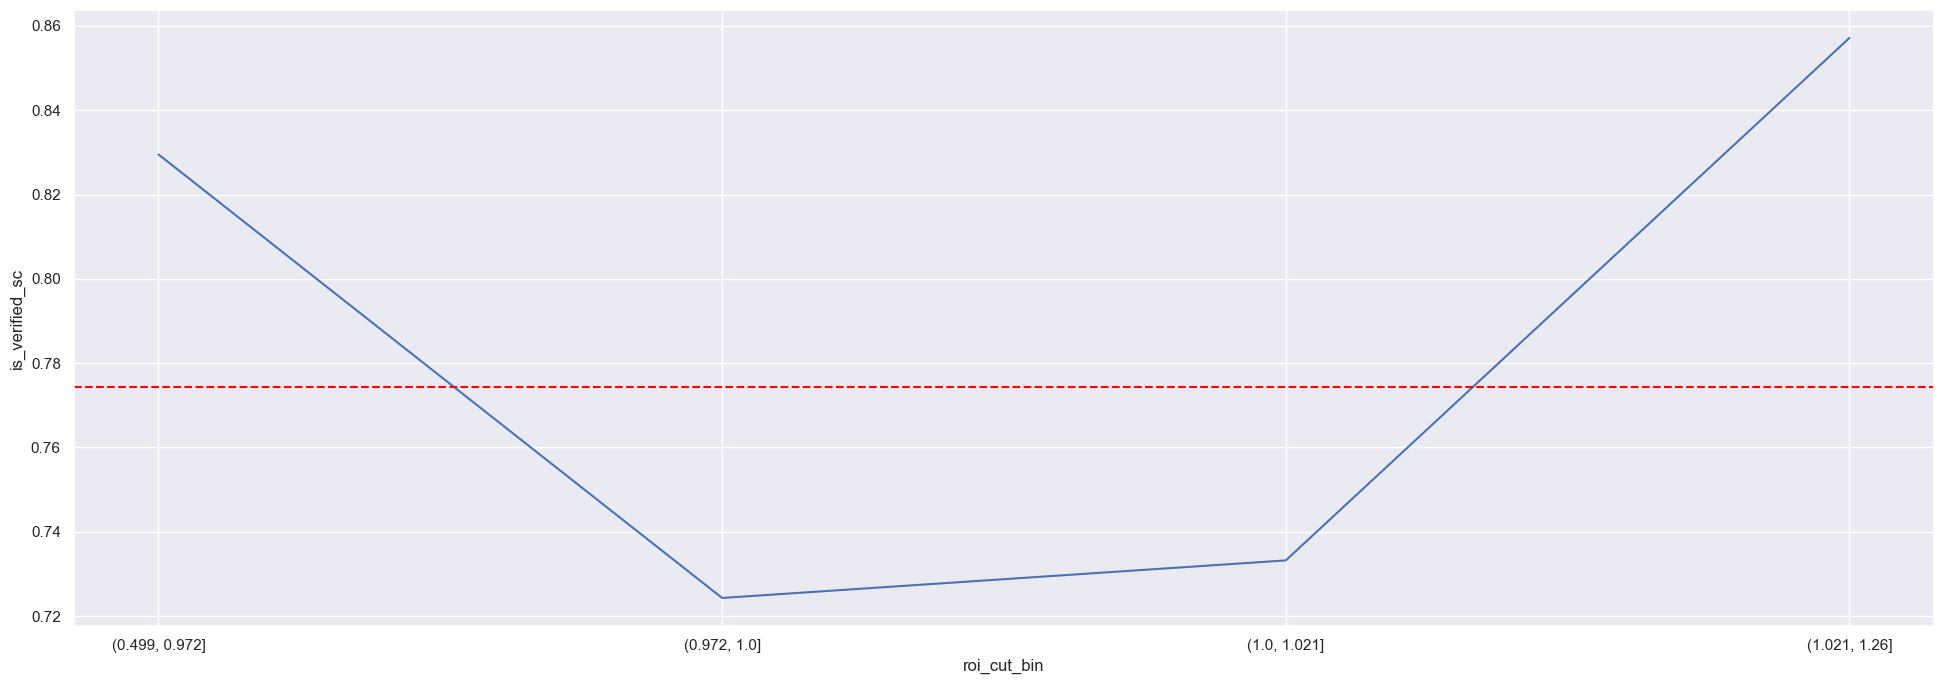

In [158]:
per_sc_per_week_info_temp_agg=per_sc_per_week_info_temp.groupby(["roi_cut_bin"])["is_verified_sc"].mean().reset_index()
per_sc_per_week_info_temp_agg['roi_cut_bin'] = per_sc_per_week_info_temp_agg['roi_cut_bin'].astype(str)
sns.lineplot(data=per_sc_per_week_info_temp_agg, x='roi_cut_bin', y='is_verified_sc')
avg_verified_perc = per_sc_per_week_info_temp['is_verified_sc'].mean()
plt.axhline(y=avg_verified_perc,color='red',linestyle='--')

<Axes: xlabel='overall_roi', ylabel='is_verified_sc'>

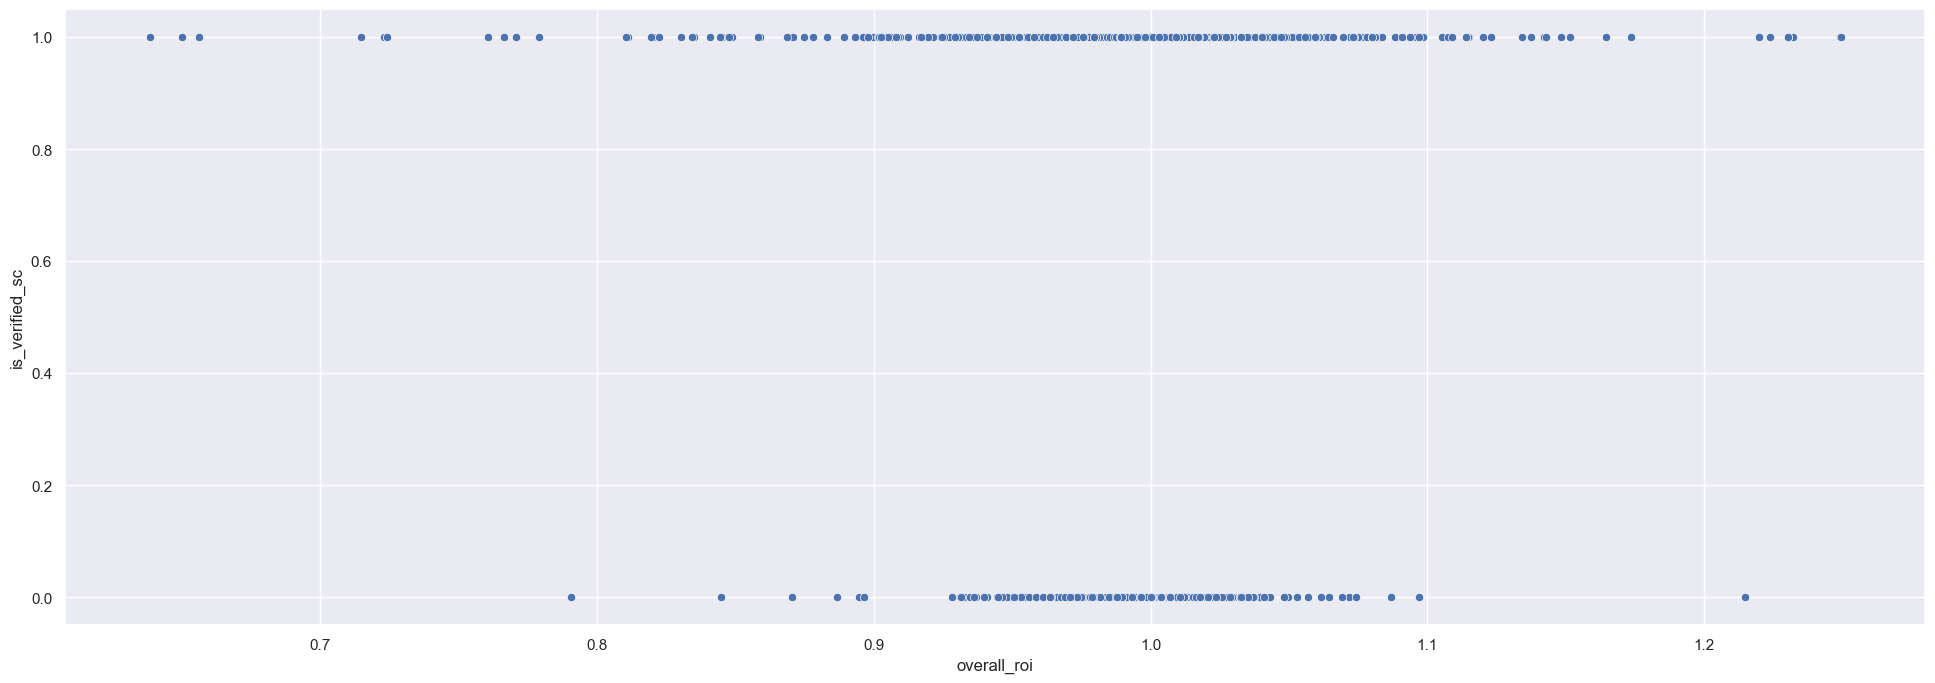

In [159]:
sns.scatterplot(per_sc_per_week_info_temp, x='overall_roi', y='is_verified_sc')

In [147]:
per_sc_per_week_info_temp.groupby(["roi_cut_bin", "is_verified_sc"])["nf_position_manager_address"].nunique()

roi_cut_bin     is_verified_sc
(0.499, 0.972]  False             29
                True              53
(0.972, 1.0]    False             50
                True              66
(1.0, 1.021]    False             56
                True              59
(1.021, 1.26]   False             25
                True              58
Name: nf_position_manager_address, dtype: int64

In [150]:
per_sc_per_week_info_temp_one_ob_only = per_sc_per_week_info_temp.groupby(["nf_position_manager_address", "pool_address", "is_verified_sc"])["overall_roi"].median().reset_index()
per_sc_per_week_info_temp_one_ob_only['rank_pct'] = per_sc_per_week_info_temp_one_ob_only.groupby(["pool_address"])["overall_roi"].rank(pct=True)

In [151]:
roi_bins_pct_rank_one_ob_only=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#per_sc_per_week_info_temp = per_sc_per_week_info.copy()
per_sc_per_week_info_temp_one_ob_only["roi_cut_bin_pool"] = pd.cut(per_sc_per_week_info_temp_one_ob_only["rank_pct"], bins=roi_bins_pct_rank_one_ob_only, include_lowest=True, right=True)

In [160]:

#per_sc_per_week_info_temp = per_sc_per_week_info_new.copy()
#per_sc_per_week_info_temp = per_sc_per_week_info_temp[per_sc_per_week_info_temp["pool_address"]!='0x11b815efb8f581194ae79006d24e0d814b7697f6']
per_sc_per_week_info_temp_one_ob_only['daily_overall_roi'] = per_sc_per_week_info_temp_one_ob_only['overall_roi']
#q05 = per_sc_per_week_info_temp["daily_overall_roi"].quantile(0.05)
#q95 = per_sc_per_week_info_temp["daily_overall_roi"].quantile(0.95)
q25 = per_sc_per_week_info_temp_one_ob_only["daily_overall_roi"].quantile(0.25)
q50 = per_sc_per_week_info_temp_one_ob_only["daily_overall_roi"].quantile(0.50)
q75 = per_sc_per_week_info_temp_one_ob_only["daily_overall_roi"].quantile(0.75)
roi_bins=[0.5, q25, q50, q75, 1.26]
per_sc_per_week_info_temp_one_ob_only["roi_cut_bin"] = pd.cut(per_sc_per_week_info_temp_one_ob_only["daily_overall_roi"], bins=roi_bins, include_lowest=True, right=True)

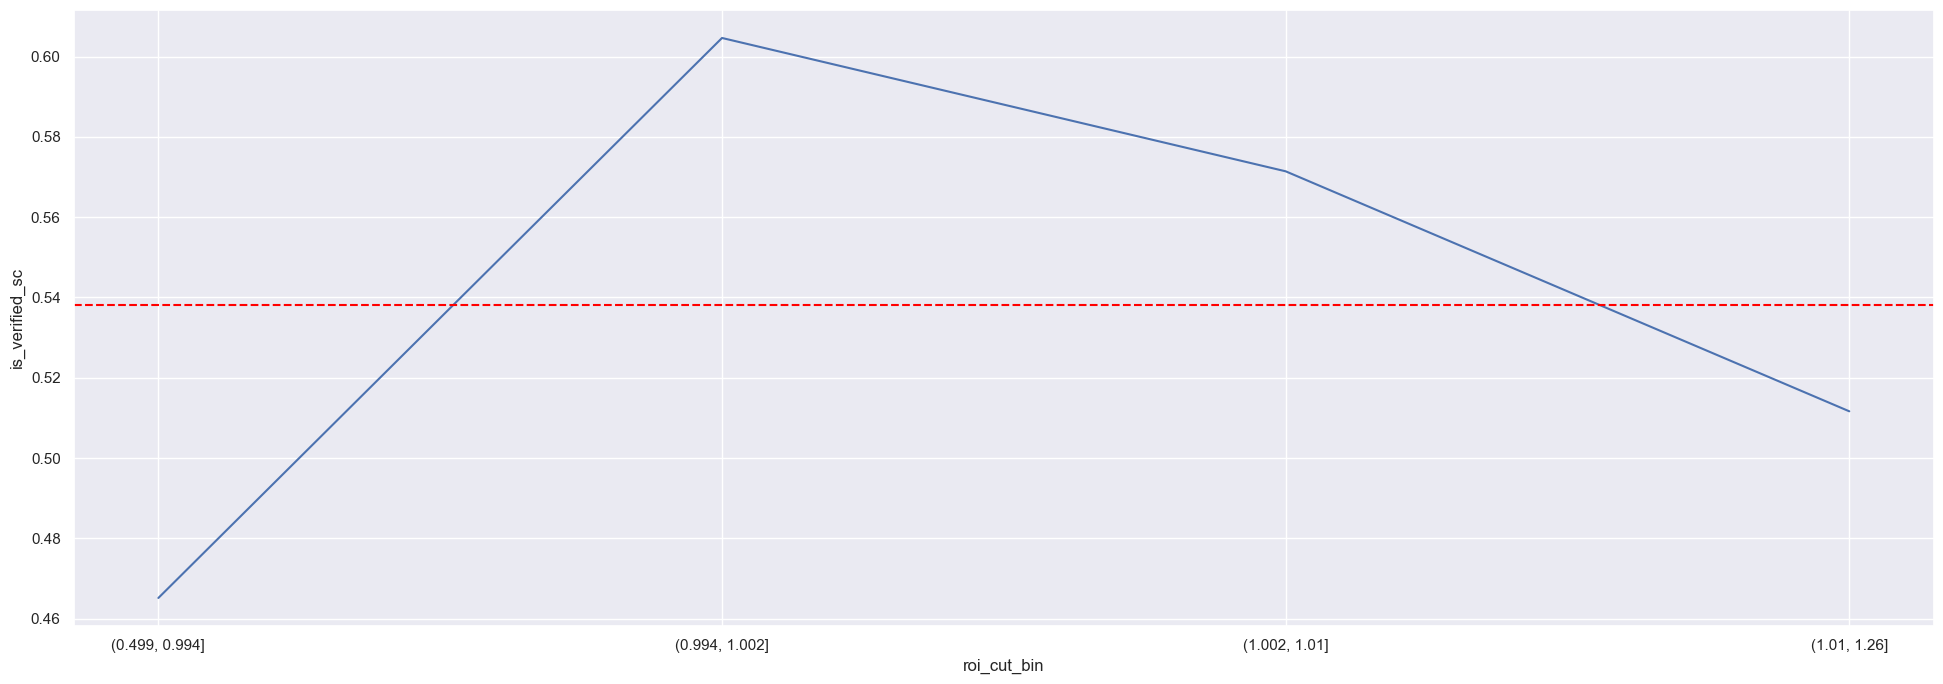

In [161]:
per_sc_per_week_info_temp_agg=per_sc_per_week_info_temp_one_ob_only.groupby(["roi_cut_bin"])["is_verified_sc"].mean().reset_index()
per_sc_per_week_info_temp_agg['roi_cut_bin'] = per_sc_per_week_info_temp_agg['roi_cut_bin'].astype(str)
sns.lineplot(data=per_sc_per_week_info_temp_agg, x='roi_cut_bin', y='is_verified_sc')
avg_verified_perc = per_sc_per_week_info_temp_one_ob_only['is_verified_sc'].mean()
plt.axhline(y=avg_verified_perc,color='red',linestyle='--')

In [149]:
-per_sc_per_week_info_temp_one_ob_only.groupby(["is_verified_sc"])["roi_cut_bin_pool"].value_counts()

is_verified_sc               
False           (0.2, 0.3]       11
                (0.7, 0.8]       11
                (0.1, 0.2]       10
                (0.9, 1.0]       10
                (0.4, 0.5]        7
                (0.8, 0.9]        7
                (0.3, 0.4]        6
                (0.5, 0.6]        6
                (0.6, 0.7]        6
                (-0.001, 0.1]     5
True            (-0.001, 0.1]    11
                (0.3, 0.4]       11
                (0.4, 0.5]       11
                (0.6, 0.7]       11
                (0.5, 0.6]       10
                (0.8, 0.9]       10
                (0.9, 1.0]        9
                (0.1, 0.2]        7
                (0.2, 0.3]        6
                (0.7, 0.8]        6
Name: roi_cut_bin_pool, dtype: int64

In [ ]:
per_sc_per_week_info_temp_one_ob_only

In [157]:
per_sc_per_week_info_temp_one_ob_only["is_verified_sc"].mean()

0.5380116959064327

In [ ]:
per_sc_per_week_info_temp_agg

In [31]:
sc_daily_obs_df.columns

Index(['position_id', 'date', 'liquidity_mpz', 'net_liquidity', 'tick_lower',
       'tick_upper', 'current_tick', 'sqrtPrice', 'amount0', 'amount1', 'fee0',
       'fee1', 'price_range', 'active_perc', 'amount0_input', 'amount1_input',
       'amount0_output', 'amount1_output', 'low', 'high', 'open', 'close',
       'low_tick', 'high_tick', 'open_tick', 'close_tick', 'volume_crypto_abs',
       'volume_stable_abs', 'volume_crypto_net', 'volume_stable_net',
       'volume_usd', 'volume_crypto_net_usd', 'volume_stable_net_usd',
       'buying_crypto_trade_cnt', 'buying_stable_trade_cnt', 'pool_address',
       'amount', 'fee', 'amount_input', 'amount_output', 'amount0_last',
       'amount1_last', 'amount_last', 'total_amount0', 'total_amount1',
       'total_amount', 'nf_position_manager_address', 'is_verified_sc',
       'daily_overall_roi', 'daily_amount_roi', 'daily_fee_roi', 'week'],
      dtype='object')

In [32]:
sc_input_info = per_sc_per_week_info.merge(sc_daily_obs_df.groupby(["pool_address", "nf_position_manager_address", "week"])["amount_input"].sum().reset_index(), how='left', on=["pool_address", "nf_position_manager_address", "week"]).merge(sc_daily_obs_df.groupby(["pool_address", "nf_position_manager_address", "week"])["amount"].sum().reset_index(), how='left', on=["pool_address", "nf_position_manager_address", "week"]).merge(sc_daily_obs_df.groupby(["pool_address", "nf_position_manager_address", "week"])["amount_output"].sum().reset_index(), how='left', on=["pool_address", "nf_position_manager_address", "week"]).merge(sc_daily_obs_df.groupby(["pool_address", "nf_position_manager_address", "week"])["position_id"].nunique().reset_index(), how='left', on=["pool_address", "nf_position_manager_address", "week"])
sc_input_info.sort_values(by=["pool_address", "nf_position_manager_address", "week"], inplace=True)
sc_input_info["amount_input_cumsum"] = sc_daily_obs_df.groupby(["pool_address", "nf_position_manager_address", "week"])["amount_input"].cumsum()

#sc_input_info = sc_input_info[sc_input_info["nf_position_manager_address"].isin(more_than_one_user)].copy()

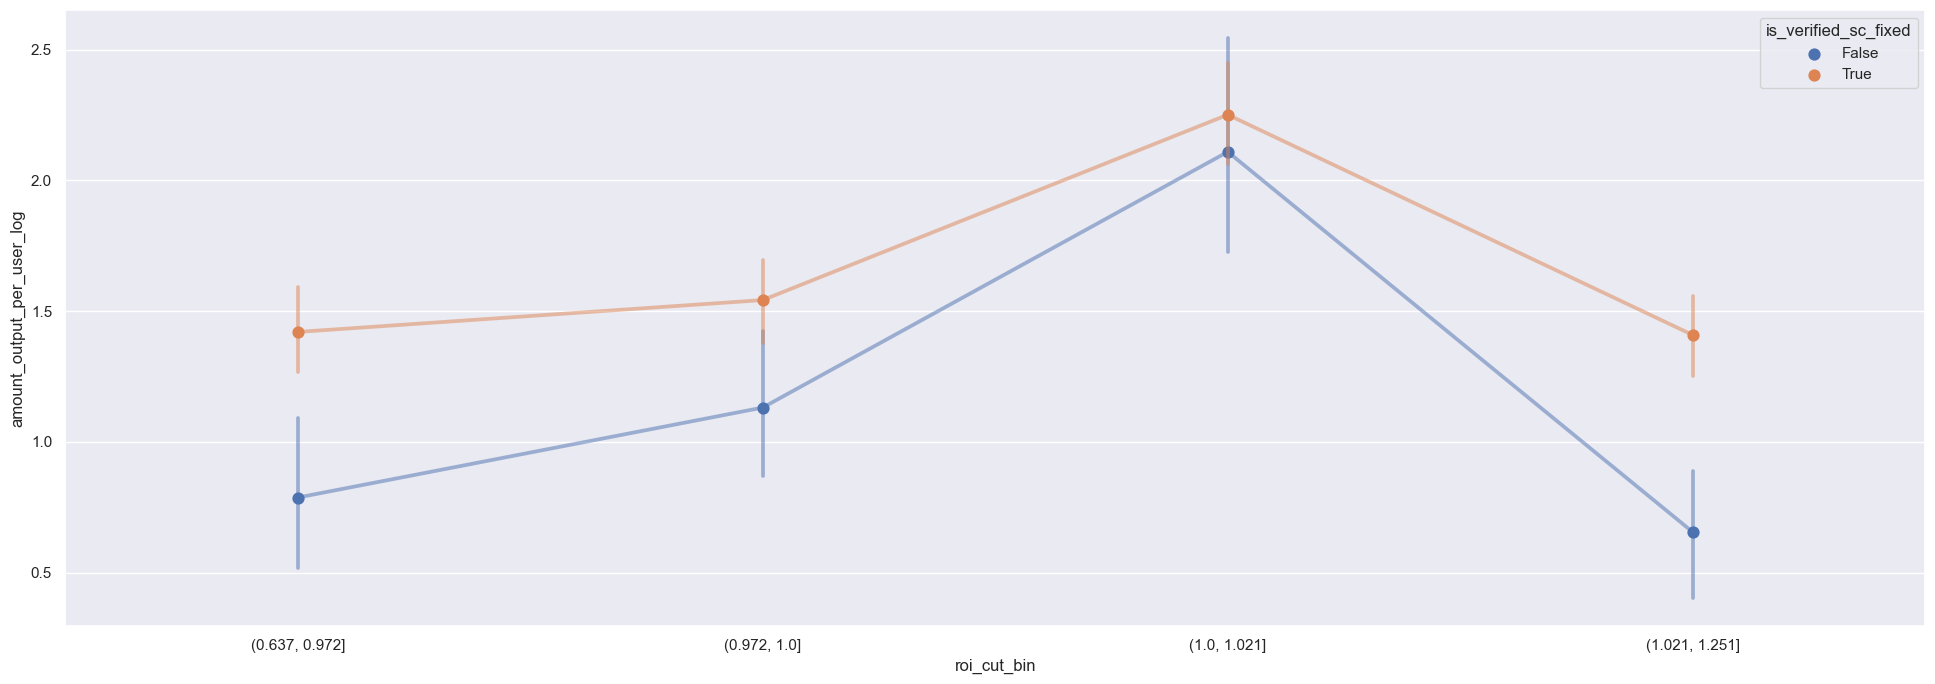

In [33]:
roi_bins=[q_min, first_quantile, median, thrid_quantile, q_max]
#roi_bins = [q_low, q2, q4, q5, q6, q8, q_hi]
#roi_bins=[q1, q2, q3, q4, median, q6, q7, q8, q9, q_hi]
sc_input_info["roi_cut_bin"] = pd.cut(sc_input_info["daily_overall_roi"], bins=roi_bins, include_lowest=True, right=True)
sc_input_info["net_asset_flow"] = sc_input_info["amount_input"] - sc_input_info["amount_output"]
sc_input_info["amount_input_per_user"] = sc_input_info["amount_input"] / sc_input_info["lp_cnt_fixed"]
sc_input_info["amount_output_per_user"] = sc_input_info["amount_output"] / sc_input_info["lp_cnt_fixed"]

sc_input_info["amount_input_cumsum_per_user"] = sc_input_info["amount_input_cumsum"] / sc_input_info["new_sc_user_cumsum"]
sc_input_info["amount_per_user"] = sc_input_info["amount"] / sc_input_info["lp_cnt_fixed"]


sc_input_info["amount_input_log"] = np.log10(sc_input_info["amount_input"] + 1)
sc_input_info["amount_log"] = np.log10(sc_input_info["amount"] + 1)


sc_input_info["amount_input_cumsum_log"] = np.log10(sc_input_info["amount_input_cumsum"] + 1)
sc_input_info["amount_output_per_user_log"] = np.log10(sc_input_info["amount_output_per_user"] + 1)
sc_input_info["amount_input_per_user_log"] = np.log10(sc_input_info["amount_input_per_user"] + 1)

sc_input_info["amount_input_cumsum_per_user_log"] = np.log10(sc_input_info["amount_input_cumsum_per_user"] + 1)
sc_input_info["amount_per_user_log"] = np.log10(sc_input_info["amount_per_user"] + 1)


ax = sns.pointplot(x='roi_cut_bin', y='amount_output_per_user_log', data=sc_input_info[sc_input_info["nf_position_manager_address"].isin(more_than_one_user)].copy(), hue='is_verified_sc_fixed')
for line in ax.lines:
    line.set_alpha(0.5)
plt.show()

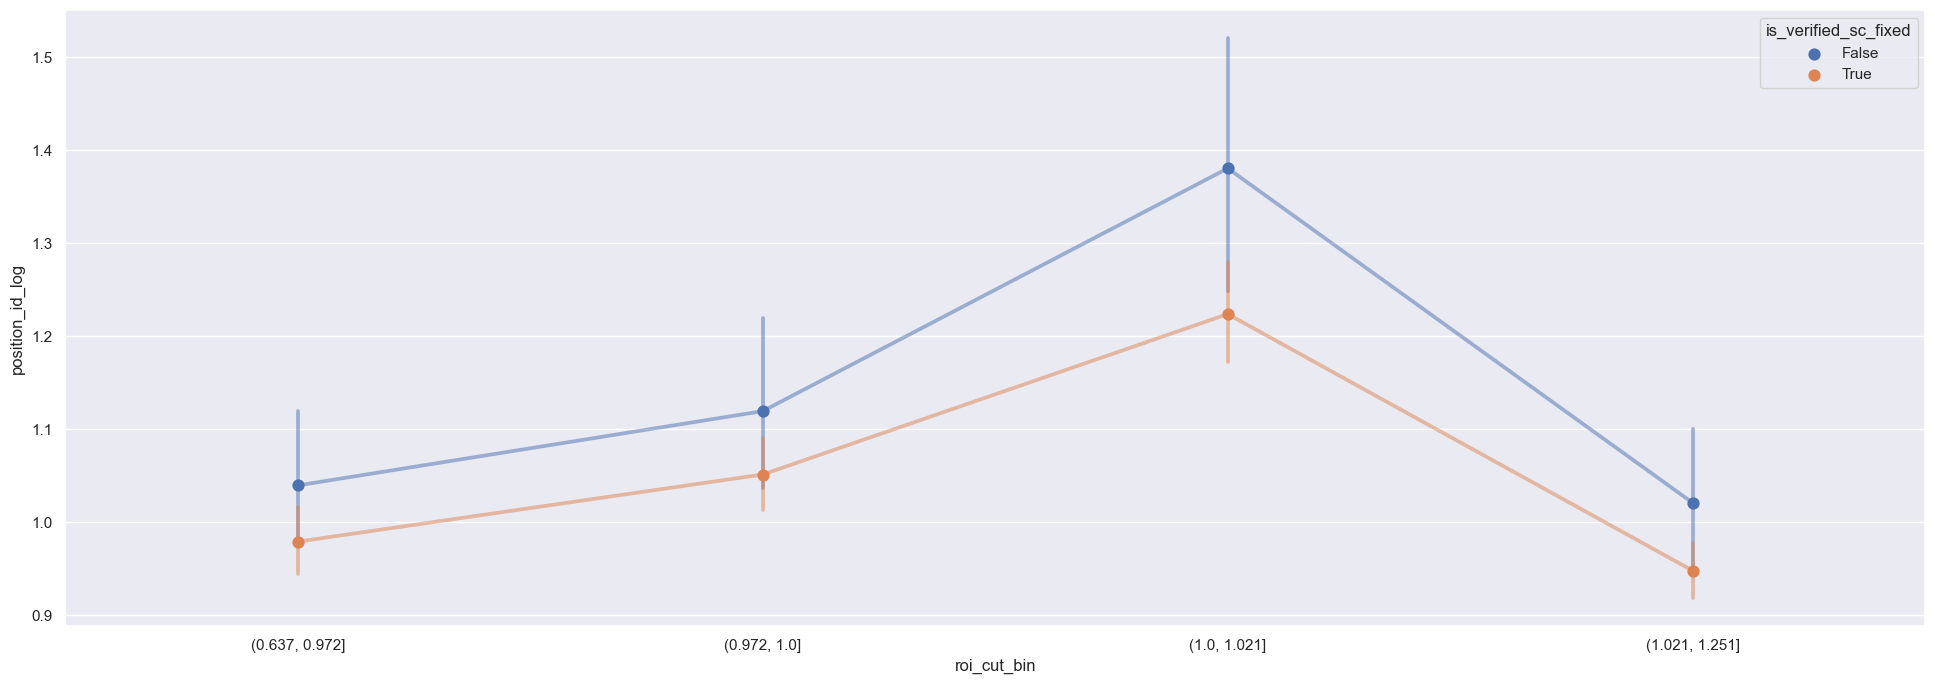

In [34]:
sc_input_info["position_id_log"] = np.log(sc_input_info["position_id"] + 1)
ax = sns.pointplot(x='roi_cut_bin', y='position_id_log', data=sc_input_info[sc_input_info["nf_position_manager_address"].isin(more_than_one_user)].copy(), hue='is_verified_sc_fixed')
for line in ax.lines:
    line.set_alpha(0.5)
plt.show()

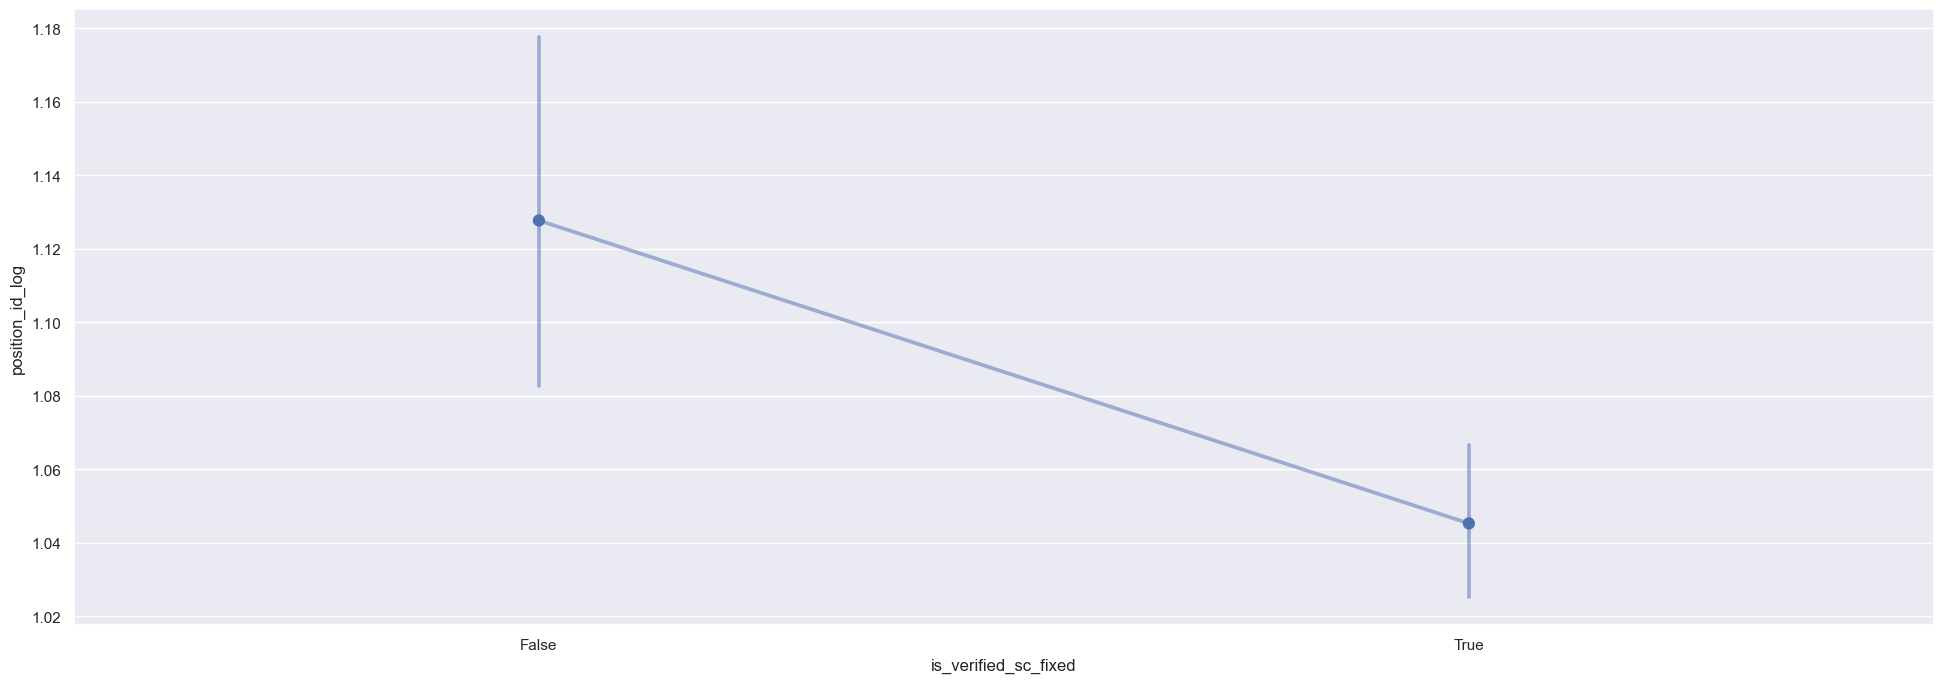

In [35]:
ax = sns.pointplot(x='is_verified_sc_fixed', y='position_id_log', data=sc_input_info[sc_input_info["nf_position_manager_address"].isin(more_than_one_user)].copy())
for line in ax.lines:
    line.set_alpha(0.5)
plt.show()

In [36]:
# each user's first participation (input) amount:
# get each user's first participation
# first get input:
# enew_sc_user_cnt
pool_action_info_sc_copy_input_money = pool_action_info_sc_copy[pool_action_info_sc_copy["action"] == 'INCREASE_LIQUIDITY'].copy()
# per user do we observe learning?


In [37]:
pool_action_info_sc_copy.columns

Index(['blockchain', 'block_number', 'block_timestamp', 'tx_hash', 'action',
       'amount0_adjusted', 'amount1_adjusted', 'amount0_usd', 'amount1_usd',
       'token0_address', 'token1_address', 'token0_symbol', 'token1_symbol',
       'token0_price', 'token1_price', 'liquidity', 'liquidity_adjusted',
       'liquidity_provider', 'nf_position_manager_address', 'nf_token_id',
       'pool_address', 'pool_name', 'tick_lower', 'tick_upper',
       'price_lower_1_0', 'price_upper_1_0', 'price_lower_0_1',
       'price_upper_0_1', 'price_lower_1_0_usd', 'price_upper_1_0_usd',
       'price_lower_0_1_usd', 'price_upper_0_1_usd', 'tx_fee', 'from_address',
       'to_address', 'token_id', 'Unnamed: 0', 'week', 'row_num_this_lp',
       'sc_new'],
      dtype='object')

In [38]:
pool_action_info_sc_copy_input_money.sort_values(by=["pool_address", 'nf_position_manager_address', 'liquidity_provider', "block_timestamp"] ,inplace=True)
pool_action_info_sc_copy_input_money["amount_input"] = pool_action_info_sc_copy_input_money['amount0_usd'] + pool_action_info_sc_copy_input_money['amount1_usd']
pool_action_info_sc_copy_input_money["amount_input_log"] = np.log10(pool_action_info_sc_copy_input_money['amount0_usd'] + pool_action_info_sc_copy_input_money['amount1_usd']+1)
pool_action_info_sc_copy_input_money.sort_values(by=['pool_address','nf_position_manager_address', 'liquidity_provider'], inplace=True)
pool_action_info_sc_copy_input_money['row_num_this_lp'] = pool_action_info_sc_copy_input_money.groupby(['pool_address','nf_position_manager_address', 'liquidity_provider']).cumcount()+1

pool_action_info_sc_copy_input_money["amount_input_lag"] = pool_action_info_sc_copy_input_money.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider'])["amount_input"].shift(1)
pool_action_info_sc_copy_input_money["amount_input_diff"] = pool_action_info_sc_copy_input_money.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider'])["amount_input"].diff()
pool_action_info_sc_copy_input_money["amount_input_log_diff"] = pool_action_info_sc_copy_input_money.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider'])["amount_input_log"].diff()

In [39]:
pool_action_info_sc_copy_input_money = pool_action_info_sc_copy[pool_action_info_sc_copy["action"] == 'INCREASE_LIQUIDITY'].copy()
pool_action_info_sc_copy_remove_money = pool_action_info_sc_copy[pool_action_info_sc_copy["action"] == 'DECREASE_LIQUIDITY'].copy()

def agg_resample(x):
    amount0_arr = x['amount0_usd'].values
    amount1_arr = x['amount1_usd'].values

    names = {
        'amount0_total': sum(amount0_arr) if len(amount0_arr) > 0 else 0,
        'amount1_total': sum(amount1_arr) if len(amount1_arr) > 0 else 0,
        'amount_total': sum(amount0_arr) + sum(amount1_arr) if len(amount0_arr) > 0 else 0
    }
    return pd.Series(names) 

In [40]:
pool_action_info_sc_copy_input_money_test = pool_action_info_sc_copy_input_money.set_index(pd.to_datetime(pool_action_info_sc_copy_input_money["block_timestamp"]))

input_total = pool_action_info_sc_copy_input_money_test.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider']).resample('W', label='left').apply(agg_resample).reset_index().merge(nft_type_mapping, how='left', on=['pool_address', 'nf_position_manager_address'])
input_total['row_num_this_lp'] = input_total.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider']).cumcount()+1
input_total.sort_values(by=["pool_address", 'nf_position_manager_address', 'liquidity_provider', 'block_timestamp'], inplace=True)
input_total["amount_input_cumsum"]= input_total.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider'])['amount_total'].cumsum()+1
input_total["amount_input_cumsum_log"] = np.log10(input_total["amount_input_cumsum"])


pool_action_info_sc_copy_remove_money_test = pool_action_info_sc_copy_remove_money.set_index(pd.to_datetime(pool_action_info_sc_copy_remove_money["block_timestamp"]))

output_total = pool_action_info_sc_copy_remove_money_test.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider']).resample('W', label='left').apply(agg_resample).reset_index().merge(nft_type_mapping, how='left', on=['pool_address', 'nf_position_manager_address'])
output_total.sort_values(by=["pool_address", 'nf_position_manager_address', 'liquidity_provider', 'block_timestamp'], inplace=True)
output_total['row_num_this_lp'] = output_total.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider']).cumcount()+1

output_total["amount_output_cumsum"]= output_total.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider'])['amount_total'].cumsum()+1
output_total["amount_output_cumsum_log"] = np.log10(output_total["amount_output_cumsum"])

In [41]:
output_total.sort_values(by=["pool_address", 'nf_position_manager_address', 'liquidity_provider', 'block_timestamp'], inplace=True)
output_total['row_num_this_lp'] = output_total.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider']).cumcount()+1

output_total["amount_output_cumsum"]= output_total.groupby(["pool_address", 'nf_position_manager_address', 'liquidity_provider'])['amount_total'].cumsum()+1
output_total["amount_output_cumsum_log"] = np.log10(output_total["amount_output_cumsum"])

In [50]:
input_total["is_verified_sc_str"] = input_total["is_verified_sc"].astype(str)
merged_input_output = input_total.merge(output_total, on = ["pool_address", 'nf_position_manager_address', 'liquidity_provider', 'block_timestamp'])
merged_input_output["amount_input_minus_output"] = merged_input_output["amount_input_cumsum"] - merged_input_output["amount_output_cumsum"]

In [51]:
merged_input_output.columns

Index(['pool_address', 'nf_position_manager_address', 'liquidity_provider',
       'block_timestamp', 'amount0_total_x', 'amount1_total_x',
       'amount_total_x', 'is_verified_sc_x', 'row_num_this_lp_x',
       'amount_input_cumsum', 'amount_input_cumsum_log', 'is_verified_sc_str',
       'amount0_total_y', 'amount1_total_y', 'amount_total_y',
       'is_verified_sc_y', 'row_num_this_lp_y', 'amount_output_cumsum',
       'amount_output_cumsum_log', 'amount_input_minus_output'],
      dtype='object')

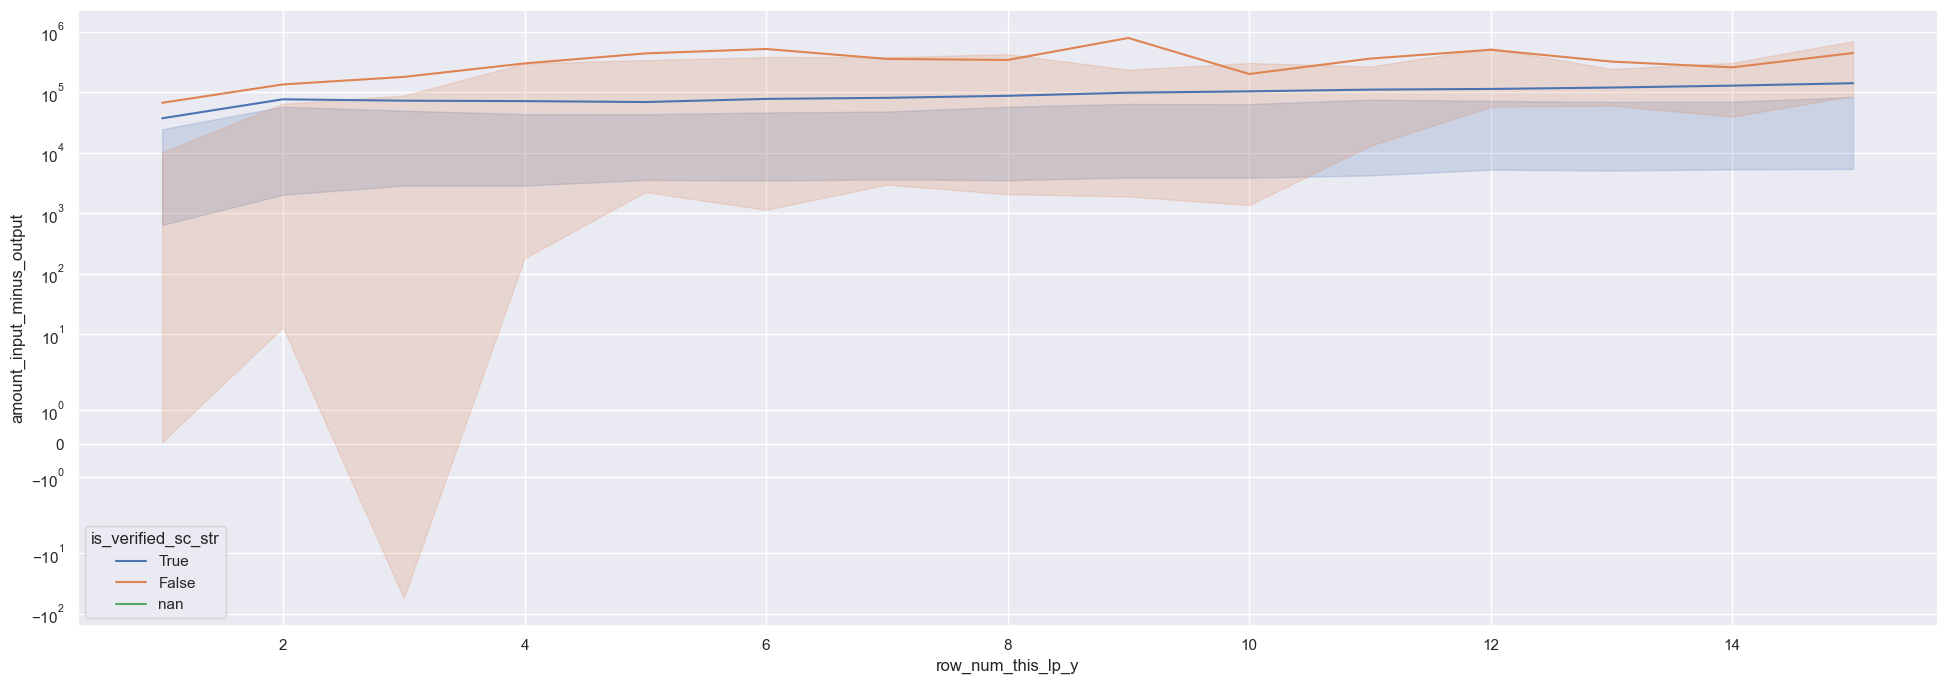

In [54]:
g = sns.lineplot(merged_input_output[merged_input_output["row_num_this_lp_y"]<=15], x='row_num_this_lp_y', y='amount_input_minus_output', hue='is_verified_sc_str', errorbar=('pi', 50), estimator='mean')
g.set_yscale("symlog")

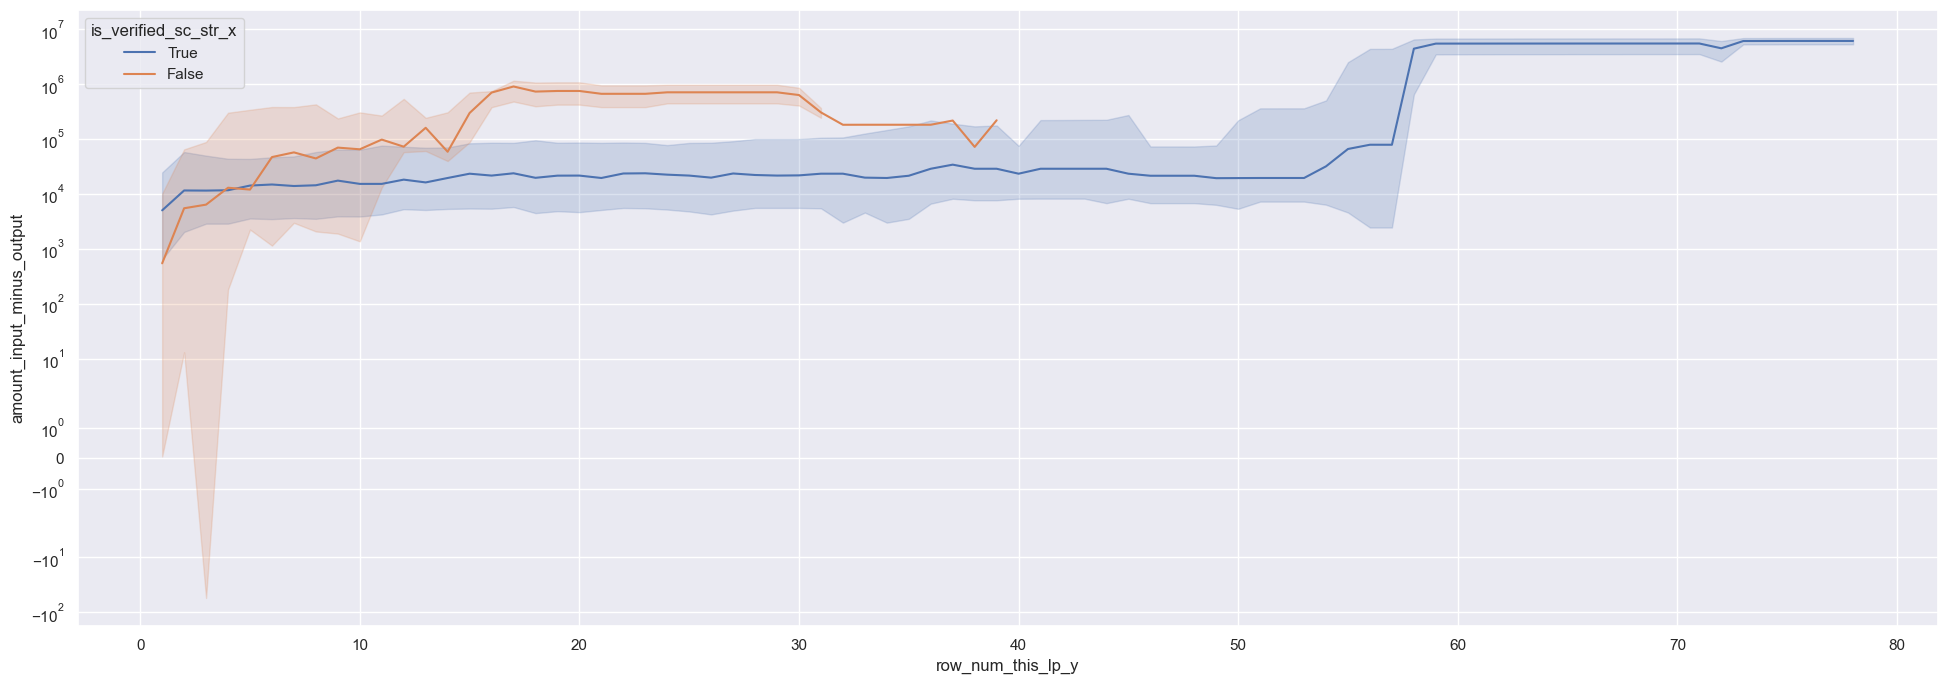

In [638]:
g2 = sns.lineplot(merged_input_output, x='row_num_this_lp_y', y='amount_input_minus_output', hue='is_verified_sc_str_x', errorbar=('pi', 50), estimator='median')
g2.set_yscale("symlog")

<Axes: xlabel='row_num_this_lp', ylabel='amount_input_cumsum_log'>

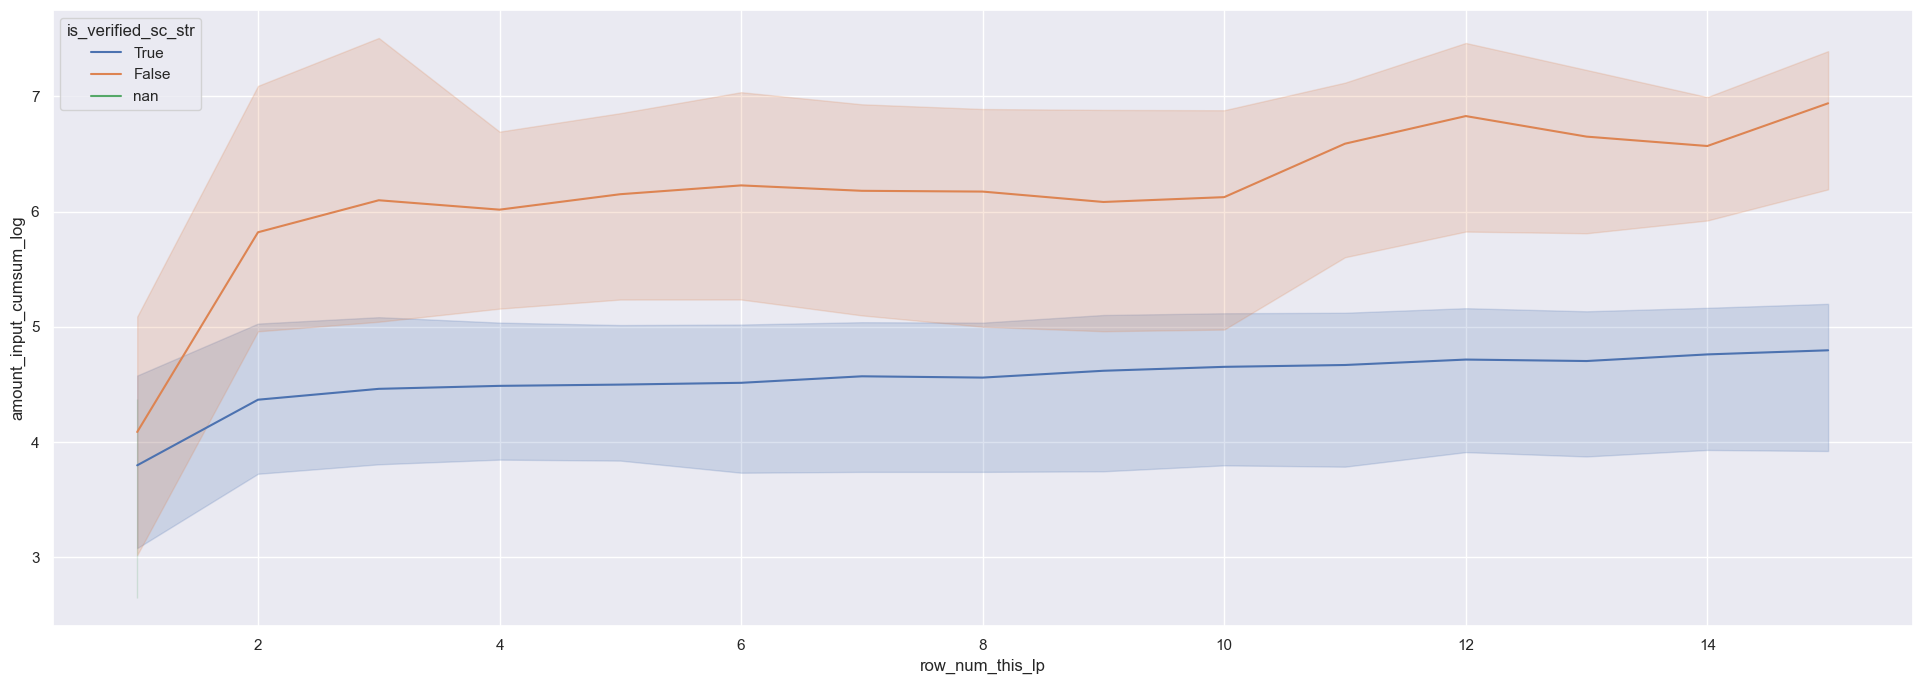

In [56]:
sns.lineplot(input_total[input_total["row_num_this_lp"] <= 15].copy(), x='row_num_this_lp', y='amount_input_cumsum_log', hue='is_verified_sc_str', errorbar=('pi', 50), estimator='mean')

<Axes: xlabel='row_num_this_lp', ylabel='amount_output_cumsum_log'>

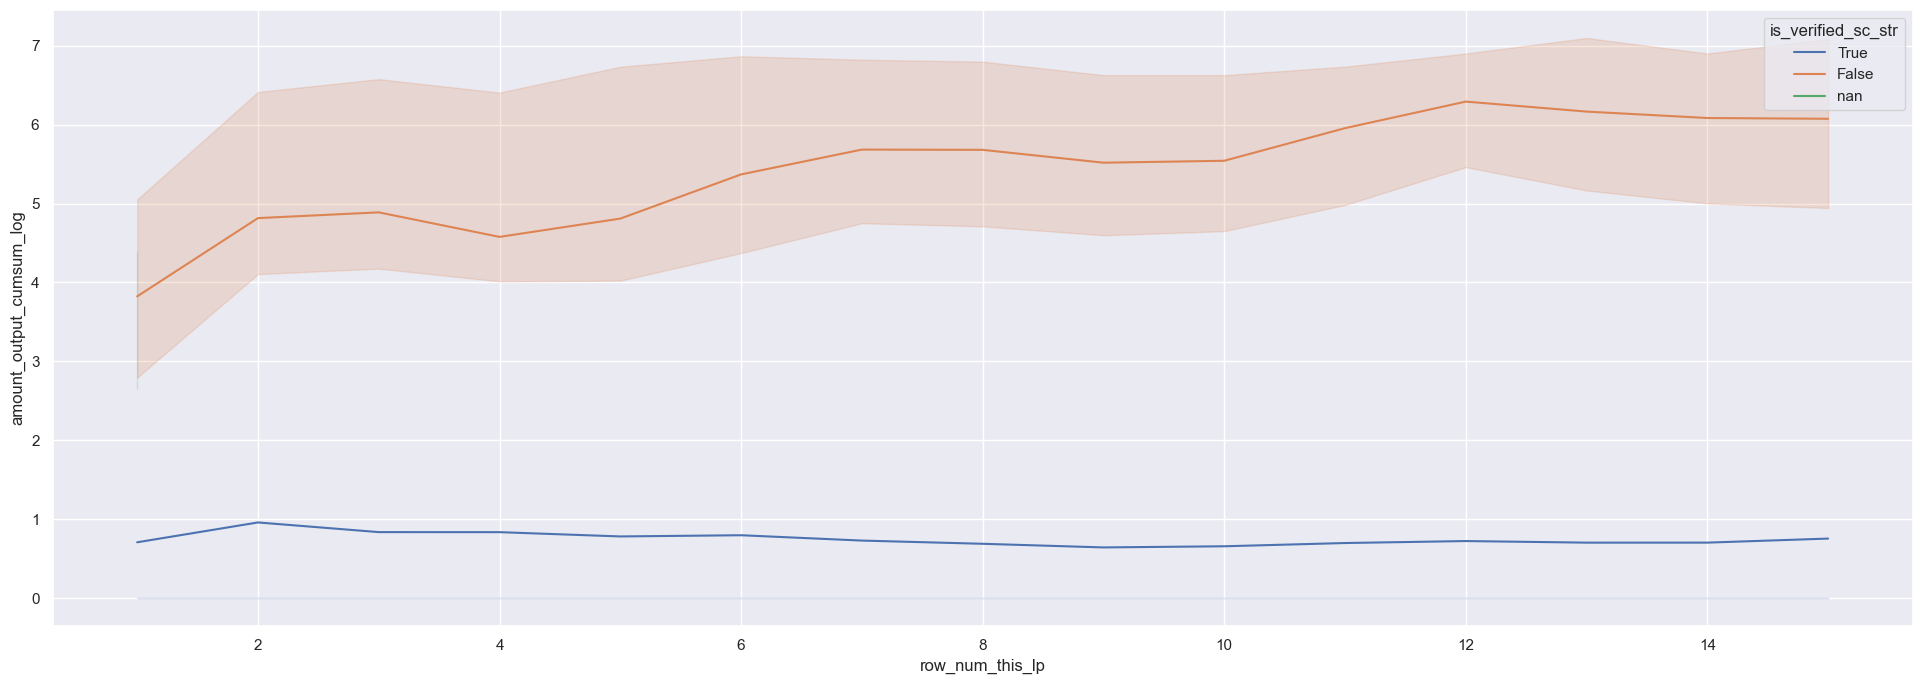

In [66]:
output_total["is_verified_sc_str"] = output_total["is_verified_sc"].astype(str)
output_total_filterd = output_total.copy()
#output_total_filterd = output_total[output_total["amount_output_cumsum"] > 1].copy()
sns.lineplot(output_total_filterd[output_total_filterd["row_num_this_lp"] <= 15].copy(), x='row_num_this_lp', y='amount_output_cumsum_log', hue='is_verified_sc_str', errorbar=('pi', 50), estimator='mean')

In [61]:
output_total.groupby(["is_verified_sc"])["amount_output_cumsum_log"].describe()

,count,mean,std,min,25%,50%,75%,max
is_verified_sc,,,,,,,,
False,758.0,4.942714,2.181437,0.0,3.953188,5.143563,6.39599,8.999891
True,39906.0,0.820698,1.775787,0.0,0.000000,0.000000,0.00000,8.733604


<Axes: xlabel='row_num_this_lp', ylabel='amount_input_cumsum_log'>

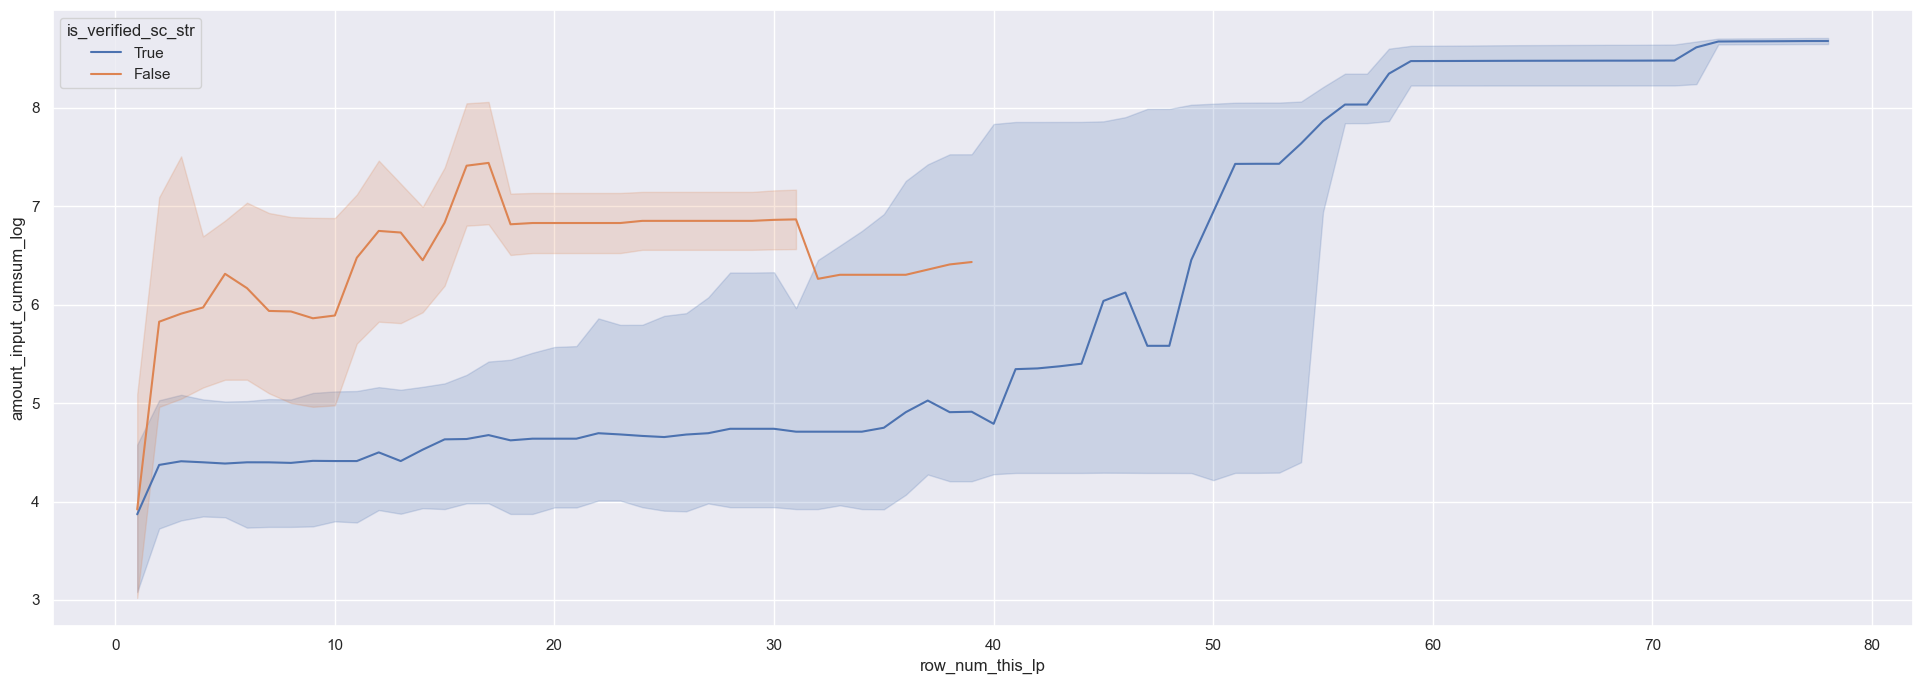

In [630]:
sns.lineplot(input_total, x='row_num_this_lp', y='amount_input_cumsum_log', hue='is_verified_sc_str', errorbar=('pi', 50), estimator='median')

<Axes: xlabel='row_num_this_lp', ylabel='amount_output_cumsum_log'>

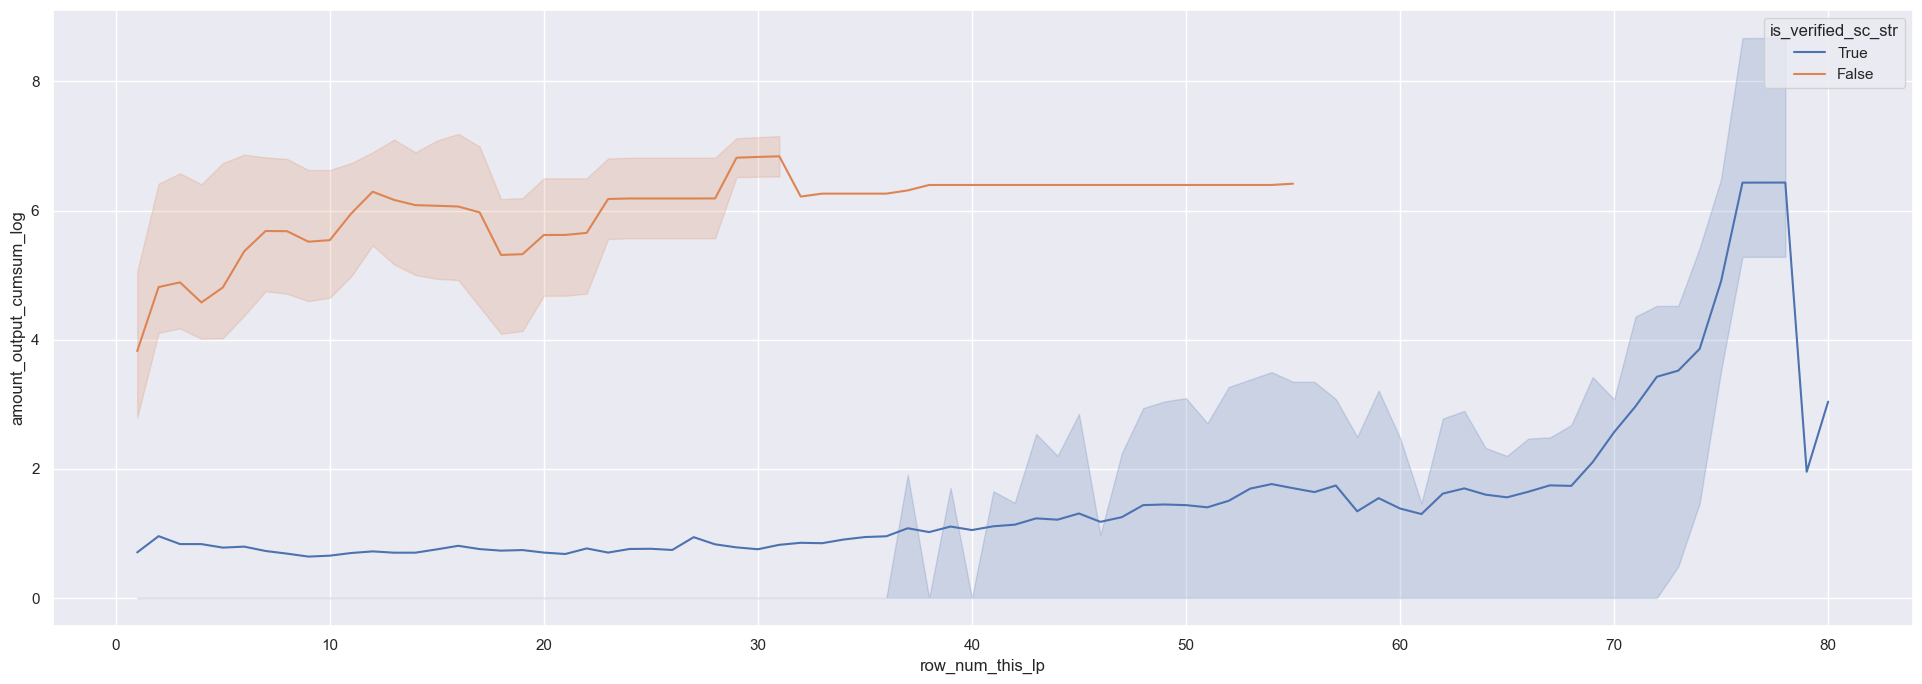

In [644]:
sns.lineplot(output_total, x='row_num_this_lp', y='amount_output_cumsum_log', hue='is_verified_sc_str', errorbar=('pi', 50), estimator='mean')

In [540]:
pool_action_info_sc_copy_input_money_subset = pool_action_info_sc_copy_input_money.dropna(subset=["amount_input_lag"]).copy()

In [569]:
pool_action_info_sc_copy_input_money_first_and_second_input = pool_action_info_sc_copy_input_money_subset[pool_action_info_sc_copy_input_money_subset['row_num_this_lp'].isin([1,2,3,4])].copy()

array([[<Axes: title={'center': 'amount_input_log_diff'}>]], dtype=object)

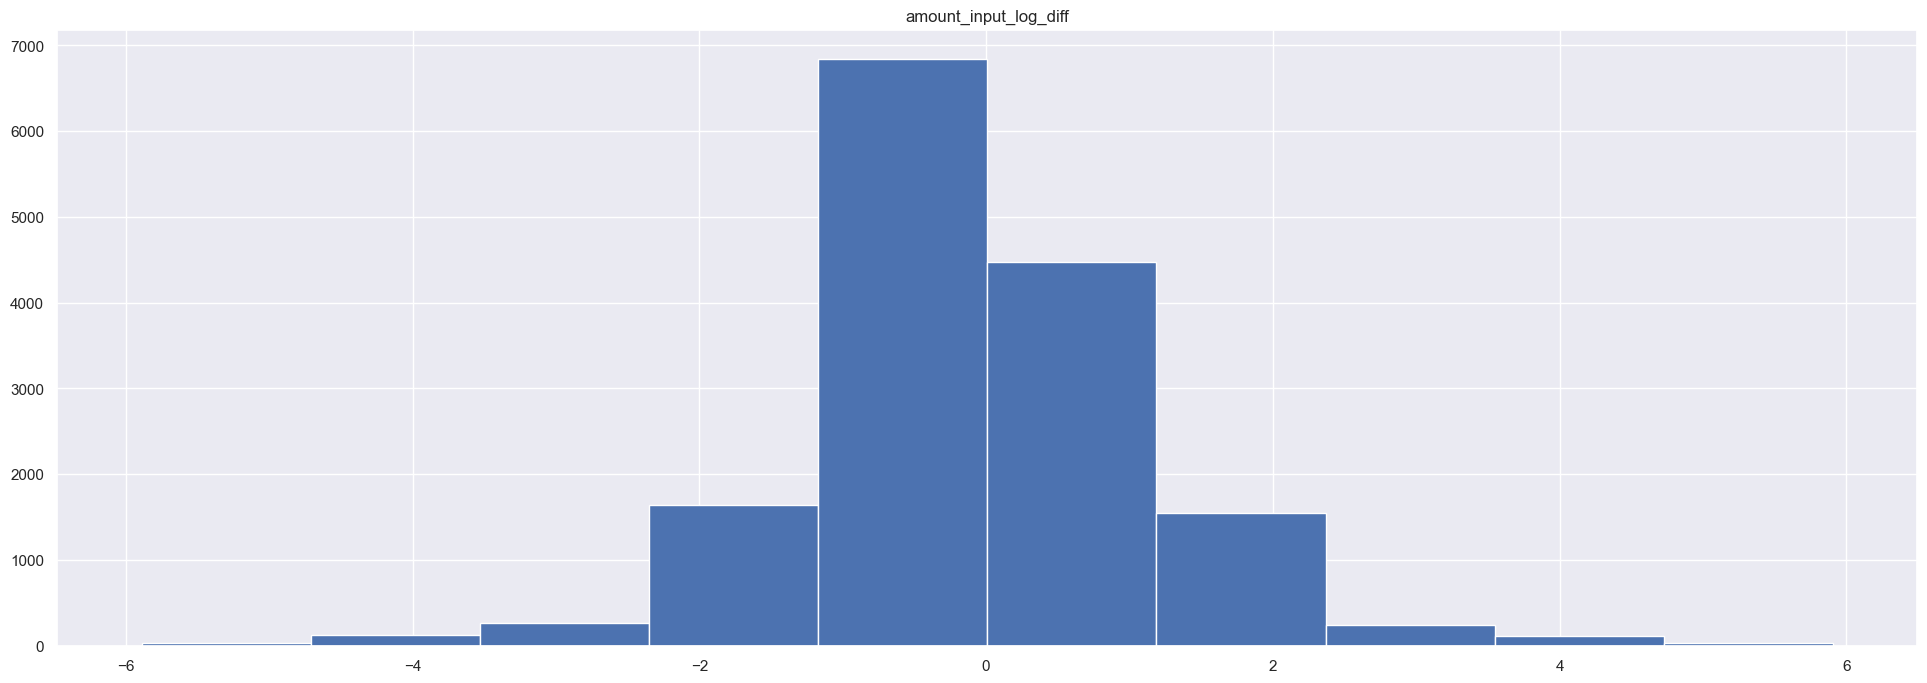

In [570]:
pool_action_info_sc_copy_input_money_subset['amount_input_diff_winsor'] = pool_action_info_sc_copy_input_money_subset.groupby('pool_address')['amount_input_diff'].transform(winsorize_series)
pool_action_info_sc_copy_input_money_subset["increased_money"] = pool_action_info_sc_copy_input_money_subset["amount_input_diff"] > 0
pool_action_info_sc_copy_input_money_subset.hist(["amount_input_log_diff"])

In [571]:
pool_action_info_sc_copy_input_money_subset["increased_money"].describe()

count     15329
unique        2
top       False
freq       7883
Name: increased_money, dtype: object

In [572]:
pool_action_info_sc_copy_input_money_subset.columns

Index(['blockchain', 'block_number', 'block_timestamp', 'tx_hash', 'action',
       'amount0_adjusted', 'amount1_adjusted', 'amount0_usd', 'amount1_usd',
       'token0_address', 'token1_address', 'token0_symbol', 'token1_symbol',
       'token0_price', 'token1_price', 'liquidity', 'liquidity_adjusted',
       'liquidity_provider', 'nf_position_manager_address', 'nf_token_id',
       'pool_address', 'pool_name', 'tick_lower', 'tick_upper',
       'price_lower_1_0', 'price_upper_1_0', 'price_lower_0_1',
       'price_upper_0_1', 'price_lower_1_0_usd', 'price_upper_1_0_usd',
       'price_lower_0_1_usd', 'price_upper_0_1_usd', 'tx_fee', 'from_address',
       'to_address', 'token_id', 'Unnamed: 0', 'week', 'row_num_this_lp',
       'sc_new', 'amount_input', 'amount_input_log', 'amount_input_lag',
       'amount_input_diff', 'amount_input_log_diff',
       'amount_input_diff_winsor', 'increased_money'],
      dtype='object')

In [573]:
pool_action_info_sc_copy_input_money_first_and_second_input.columns

Index(['blockchain', 'block_number', 'block_timestamp', 'tx_hash', 'action',
       'amount0_adjusted', 'amount1_adjusted', 'amount0_usd', 'amount1_usd',
       'token0_address', 'token1_address', 'token0_symbol', 'token1_symbol',
       'token0_price', 'token1_price', 'liquidity', 'liquidity_adjusted',
       'liquidity_provider', 'nf_position_manager_address', 'nf_token_id',
       'pool_address', 'pool_name', 'tick_lower', 'tick_upper',
       'price_lower_1_0', 'price_upper_1_0', 'price_lower_0_1',
       'price_upper_0_1', 'price_lower_1_0_usd', 'price_upper_1_0_usd',
       'price_lower_0_1_usd', 'price_upper_0_1_usd', 'tx_fee', 'from_address',
       'to_address', 'token_id', 'Unnamed: 0', 'week', 'row_num_this_lp',
       'sc_new', 'amount_input', 'amount_input_log', 'amount_input_lag',
       'amount_input_diff', 'amount_input_log_diff',
       'amount_input_diff_winsor', 'increased_money'],
      dtype='object')

<Axes: xlabel='row_num_this_lp', ylabel='amount_input_log_diff'>

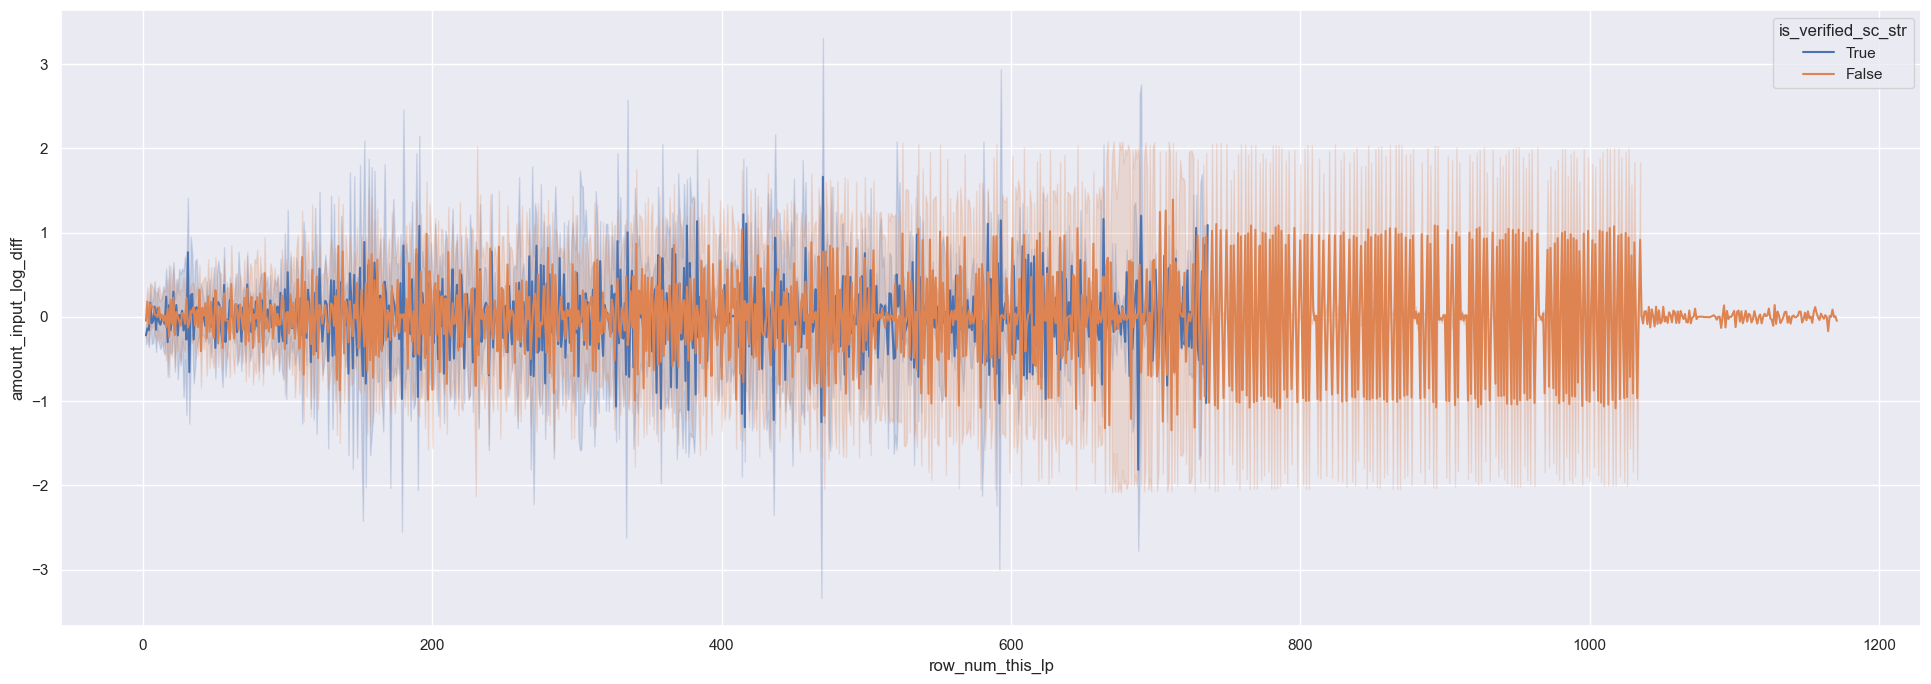

In [582]:
nft_type_mapping['is_verified_sc_str'] = nft_type_mapping['is_verified_sc'].astype(str)
sc_first_second_input = pool_action_info_sc_copy_input_money_subset.merge(nft_type_mapping, how='left', on=['pool_address', 'nf_position_manager_address'])
#sc_first_second_input.groupby(["is_verified_sc_str", "week"])["amount_input_log_diff"].mean()
sns.lineplot(x='row_num_this_lp', y='amount_input_log_diff', hue='is_verified_sc_str',data=sc_first_second_input)

In [575]:
sc_first_second_input['row_num_this_lp'].describe()

count    2321.000000
mean        2.653598
std         0.750716
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: row_num_this_lp, dtype: float64

<Axes: xlabel='week', ylabel='amount_input_log_diff'>

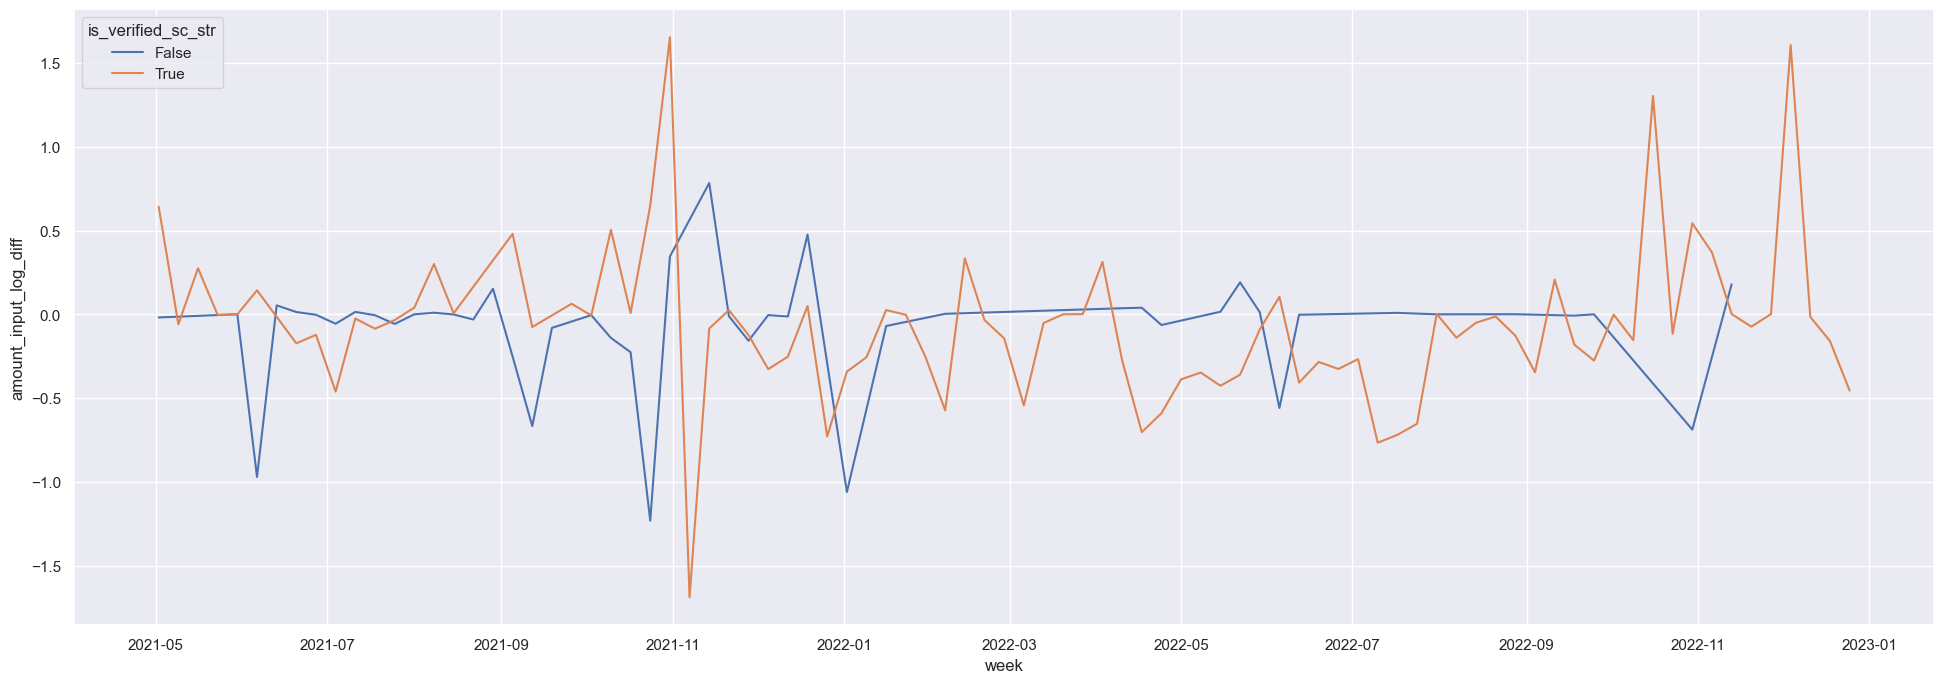

In [576]:
sns.lineplot(sc_first_second_input.groupby(["is_verified_sc_str", "week"])["amount_input_log_diff"].median().reset_index(), x='week', y='amount_input_log_diff', hue='is_verified_sc_str')

<Axes: xlabel='week', ylabel='amount_input_log_diff'>

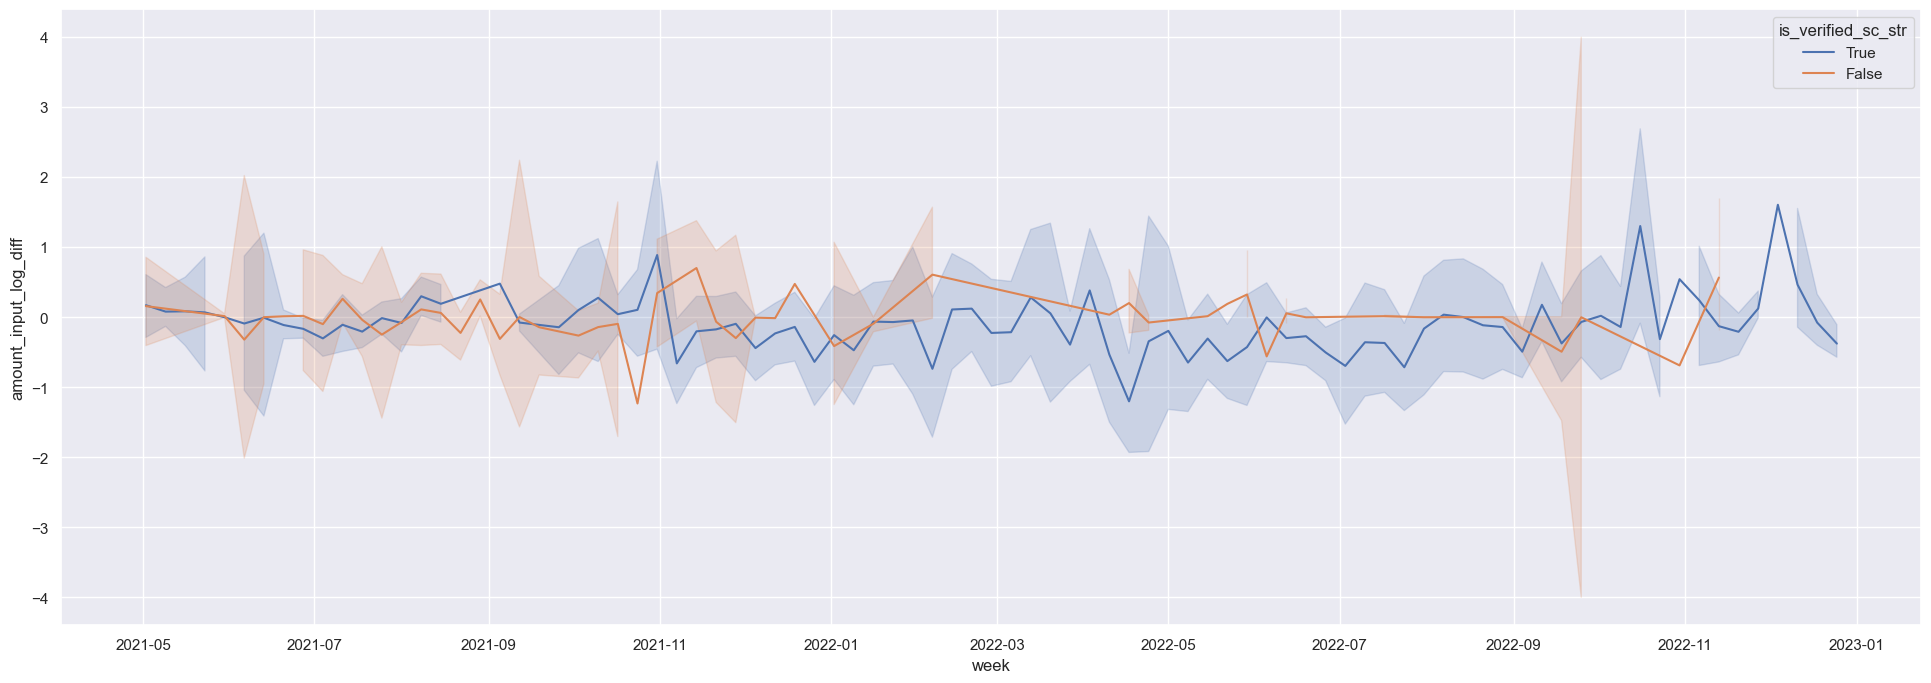

In [578]:
sns.lineplot(sc_first_second_input, x='week', y='amount_input_log_diff', hue='is_verified_sc_str')

<Axes: xlabel='row_num_this_lp', ylabel='amount_input_log_diff'>

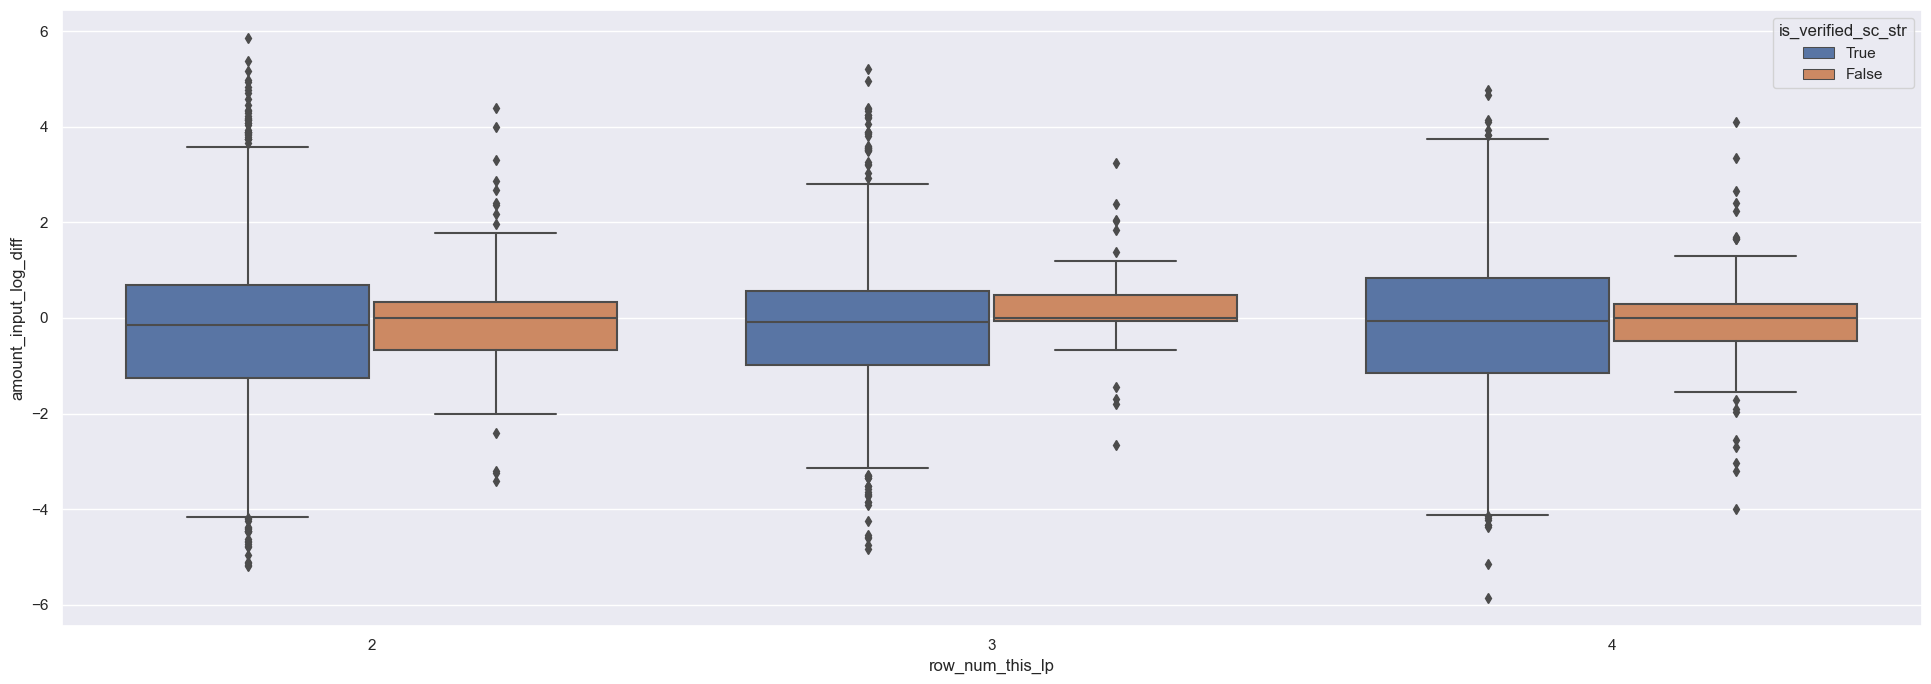

In [577]:
sns.boxplot(sc_first_second_input, x='row_num_this_lp', y='amount_input_log_diff', hue='is_verified_sc_str')

In [179]:
pool_action_info_sc_copy_input_money_subset["amount_input_diff_winsor"].describe()

count     15329.000000
mean      -1214.639456
std      210949.361967
min     -853133.725942
25%      -11245.958104
50%          -0.033588
75%        9541.641320
max      846512.854300
Name: amount_input_diff_winsor, dtype: float64

<Axes: >

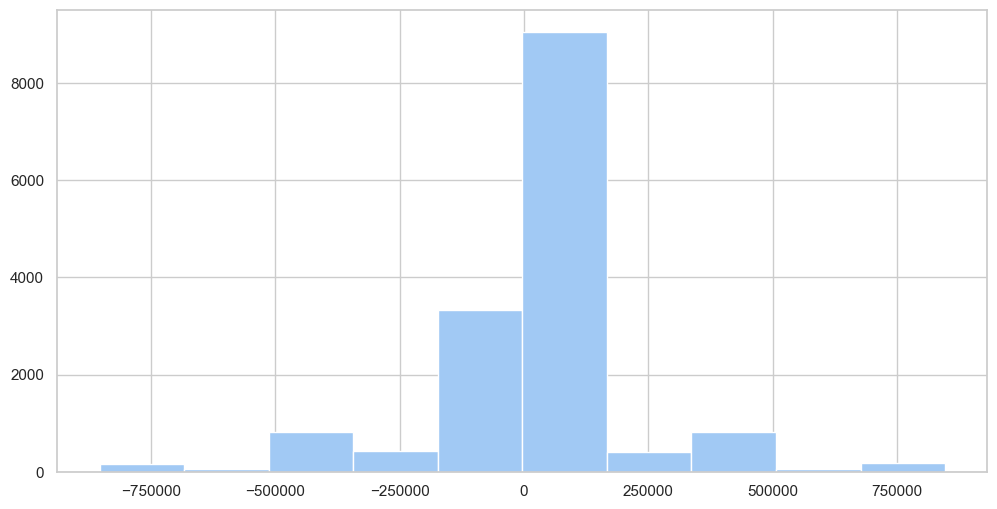

In [189]:
pool_action_info_sc_copy_input_money_subset["amount_input_diff_winsor"].hist()

<Axes: xlabel='amount_input_log_diff', ylabel='Count'>

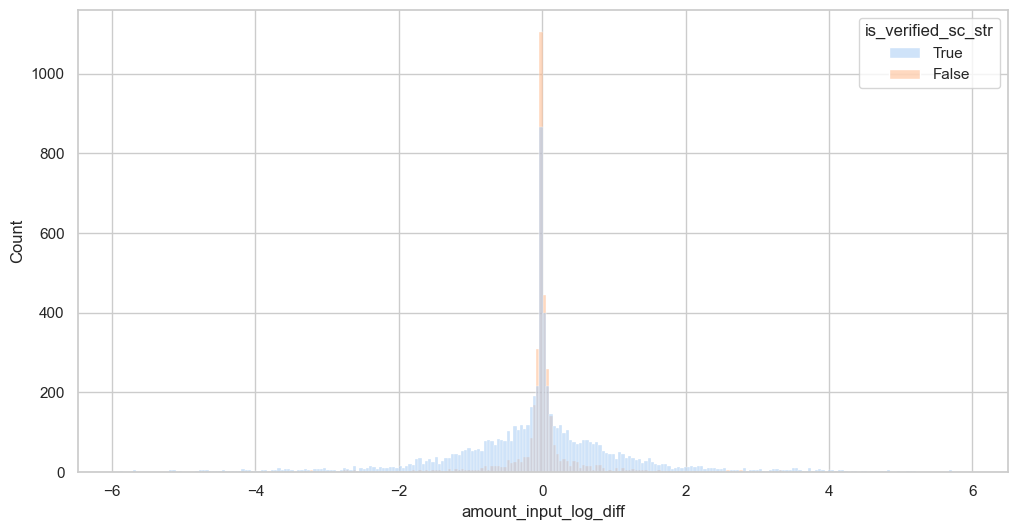

In [226]:
pool_action_info_sc_copy_input_money_subset2 = pool_action_info_sc_copy_input_money_subset[pool_action_info_sc_copy_input_money_subset["nf_position_manager_address"].isin(more_than_one_user)].copy()
nft_type_mapping['is_verified_sc_str'] = nft_type_mapping['is_verified_sc'].astype(str)
sns.histplot(x='amount_input_log_diff', hue='is_verified_sc_str',data=pool_action_info_sc_copy_input_money_subset2.merge(nft_type_mapping, how='left', on=['pool_address', 'nf_position_manager_address']))

In [221]:
pool_action_info_sc_copy_input_money_subset2["increased_money"].describe()

count     10698
unique        2
top       False
freq       5531
Name: increased_money, dtype: object

is_verified_sc
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: amount_input_log_diff, dtype: object

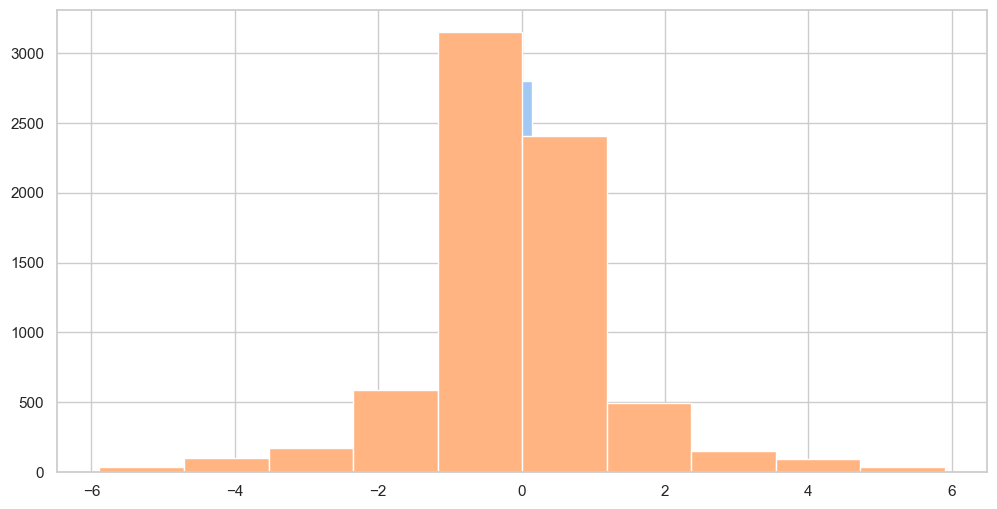

In [224]:
pool_action_info_sc_copy_input_money_subset2.merge(nft_type_mapping, how='left', on=['pool_address', 'nf_position_manager_address']).groupby(['is_verified_sc'])['amount_input_log_diff'].describe()

In [227]:
sc_input_info.columns

Index(['pool_address', 'nf_position_manager_address', 'week',
       'daily_overall_roi', 'lp_cnt', 'is_verified_sc', 'sc_new',
       'lp_cnt_fixed', 'is_verified_sc_fixed', 'new_sc_user',
       'daily_overall_roi_lag', 'new_sc_user_cumsum', 'amount_input', 'amount',
       'amount_output', 'position_id', 'amount_input_cumsum', 'roi_cut_bin',
       'net_asset_flow', 'amount_input_per_user', 'amount_output_per_user',
       'amount_input_cumsum_per_user', 'amount_per_user', 'amount_input_log',
       'amount_log', 'amount_input_cumsum_log', 'amount_output_per_user_log',
       'amount_input_per_user_log', 'amount_input_cumsum_per_user_log',
       'amount_per_user_log'],
      dtype='object')

In [229]:
pool_action_info_sc_copy_input_money_subset2["week"] = pd.to_datetime(pool_action_info_sc_copy_input_money_subset2["block_timestamp"]).dt.to_period('W-SAT').dt.start_time

In [235]:
data3 = pool_action_info_sc_copy_input_money_subset2.merge(nft_type_mapping, how='left', on=['pool_address', 'nf_position_manager_address']).merge(sc_input_info[['pool_address', 'nf_position_manager_address', 'week',"roi_cut_bin"]], how='left', on=['pool_address', 'nf_position_manager_address', 'week',]).copy()

In [239]:
sns.pointplot(x='roi_cut_bin', y='amount_input_log_diff', hue='is_verified_sc_str',data=data3, errorbar=('pi', 50))

TypeError: pointplot() got an unexpected keyword argument 'alpha'

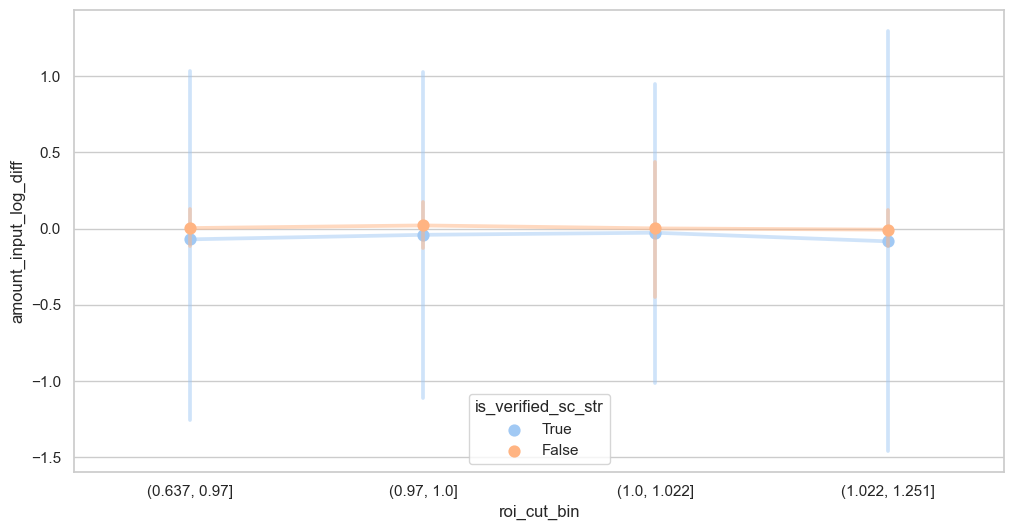

In [245]:
ax = sns.pointplot(x='roi_cut_bin', y='amount_input_log_diff', hue='is_verified_sc_str',data=data3, errorbar=('pi', 75))
for line in ax.lines:
    line.set_alpha(0.5)
plt.show()

In [ ]:
# initial money input into the pool
# second money input / first money input for sc and non-sc users


In [ ]:
# two different groups of individuals?
# average asset per user for 